In [10]:
import csv
from scipy import ndimage
from scipy import linalg
import numpy as np
import nibabel as nib
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
import pickle

<class 'list'>
[[-0.04326502 -0.04326502 -0.04326502 ... -0.04326502 -0.04326502
  -0.04326502]
 [-0.04326502 -0.04326502 -0.04326502 ... -0.04326502 -0.04326502
  -0.04326502]
 [-0.04326502 -0.04326502 -0.04326502 ... -0.04326502 -0.04326502
  -0.04326502]
 ...
 [-0.04326502 -0.04326502 -0.04326502 ... -0.04326502 -0.04326502
  -0.04326502]
 [-0.04326502 -0.04326502 -0.04326502 ... -0.04326502 -0.04326502
  -0.04326502]
 [-0.04326502 -0.04326502 -0.04326502 ... -0.04326502 -0.04326502
  -0.04326502]]


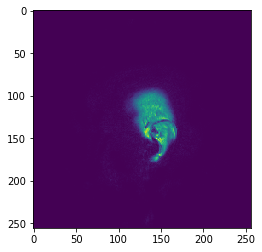

In [3]:
#Unnecessay for the network
#for testing out if the images are actually loaded  

with open("dataimage_arr.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
with open("datacsv_new_arr.txt", "rb") as fp:   # Unpickling
    c = pickle.load(fp)

import matplotlib.pyplot as plt

print(type(b))
print(b[0][1][:, :, 20])
plt.imshow(b[0][1][:, :, 20])


In [11]:
#randomly divide the patients (including their sMRI (dataimage) and informations (csv files)) into training set, 
#validation set, and testing set
import random

index = np.array(range(119))
random.seed(40)
random.shuffle(index)

train_index = index[0:84]
val_index = index[84:96]
test_index = index[96:119]


In [12]:
# reopen the sMRIs and their corresponding csv file (both in txt format) from the GPU
with open("dataimage_arr.txt", "rb") as fp:   
            dataimage = pickle.load(fp)
with open("datacsv_new_arr.txt", "rb") as fp:   
            datacsv = pickle.load(fp)
        

In [13]:
#rename csv group into numbers
mci = 0.
ad = 0.
cn = 0.
total_num = 0.
for i in range(datacsv.shape[0]):
    if datacsv[i][1] == '0':
        mci += 1.
    elif datacsv[i][1] == '1':
        ad += 1.
    elif datacsv[i][1] == '2':
        cn += 1.
total_num = mci + ad + cn
print(mci, ad, cn)

56.0 24.0 39.0


In [14]:
#AD&MCI(0), CN(1)
print(datacsv)
for i in range(datacsv.shape[0]):
    if datacsv[i][1] == '1':
        datacsv[i][1] = 0
    elif datacsv[i][1] == '2':
        datacsv[i][1] = 1
print("finished")
print(datacsv)

[['"136_S_1227"' '0' '"F"' '"65"']
 ['"136_S_0579"' '0' '"F"' '"66"']
 ['"136_S_0429"' '0' '"M"' '"63"']
 ['"136_S_0426"' '1' '"M"' '"80"']
 ['"136_S_0300"' '1' '"M"' '"57"']
 ['"136_S_0196"' '2' '"F"' '"78"']
 ['"136_S_0195"' '0' '"M"' '"80"']
 ['"136_S_0194"' '1' '"F"' '"81"']
 ['"136_S_0184"' '2' '"F"' '"79"']
 ['"136_S_0086"' '2' '"F"' '"81"']
 ['"130_S_1337"' '1' '"M"' '"72"']
 ['"130_S_0969"' '2' '"M"' '"71"']
 ['"130_S_0956"' '1' '"F"' '"64"']
 ['"130_S_0886"' '2' '"F"' '"72"']
 ['"130_S_0505"' '0' '"M"' '"80"']
 ['"130_S_0449"' '0' '"F"' '"68"']
 ['"130_S_0423"' '0' '"M"' '"81"']
 ['"128_S_1148"' '0' '"F"' '"70"']
 ['"128_S_1088"' '0' '"M"' '"89"']
 ['"127_S_0844"' '1' '"F"' '"86"']
 ['"127_S_0622"' '2' '"F"' '"76"']
 ['"127_S_0393"' '0' '"F"' '"87"']
 ['"127_S_0260"' '2' '"F"' '"79"']
 ['"126_S_0606"' '1' '"F"' '"70"']
 ['"116_S_1249"' '2' '"F"' '"71"']
 ['"116_S_1232"' '2' '"F"' '"72"']
 ['"116_S_0752"' '0' '"F"' '"83"']
 ['"116_S_0649"' '0' '"M"' '"88"']
 ['"116_S_0487"' '1'

In [22]:

#resave training data (the sMRIs and their corresponding csv file (both in txt format)) to the GPU
dataimage_train = [dataimage[j] for j in train_index]
datacsv_train = [datacsv[j] for j in train_index]
with open("dataimage_train.txt", "wb") as fp:
    pickle.dump(dataimage_train, fp)
with open("datacsv_train_bisection.txt", "wb") as fp:
    pickle.dump(datacsv_train, fp)

print("finished")

finished


In [23]:
#resave validation data (the sMRIs and their corresponding csv file (both in txt format)) to the GPU
dataimage_val = [dataimage[j] for j in val_index]
datacsv_val = [datacsv[j] for j in val_index]
with open("dataimage_val.txt", "wb") as fp:
    pickle.dump(dataimage_val, fp)
with open("datacsv_val_bisection.txt", "wb") as fp:
    pickle.dump(datacsv_val, fp)
print("finished")

finished


In [24]:
#resave testing data (the sMRIs and their corresponding csv file (both in txt format)) to the GPU
dataimage_test = [dataimage[j] for j in test_index]
datacsv_test = [datacsv[j] for j in test_index]
with open("dataimage_test.txt", "wb") as fp:
    pickle.dump(dataimage_test, fp)
with open("datacsv_test_bisection.txt", "wb") as fp:
    pickle.dump(datacsv_test, fp)
print("finished")

finished


In [25]:
from torch.utils.data import Dataset, DataLoader

def ToTensor(np_array):
    tensor = torch.from_numpy(np_array)
    tensor = tensor.float()
    return tensor

class ADNI_Dataset(Dataset):
    
    def __init__(self, ptype, transform=None):
        
        if(ptype == 'train'):
            with open("dataimage_train.txt", "rb") as fp:   # Unpickling
                b_train = pickle.load(fp)
            with open("datacsv_train_bisection.txt", "rb") as fp:   # Unpickling
                c_train = pickle.load(fp)
            self.csv = c_train
            self.image = b_train
        
        if(ptype == 'val'):
            with open("dataimage_val.txt", "rb") as fp:   # Unpickling
                b_val = pickle.load(fp)
            with open("datacsv_val_bisection.txt", "rb") as fp:   # Unpickling
                c_val = pickle.load(fp)
            self.csv = c_val
            self.image = b_val
        
        if(ptype == 'test'):
            with open("dataimage_test.txt", "rb") as fp:   # Unpickling
                b_test = pickle.load(fp)
            with open("datacsv_test_bisection.txt", "rb") as fp:   # Unpickling
                c_test = pickle.load(fp)
            self.csv = c_test
            self.image = b_test        

    def __len__(self):#return int: number of mri
        return len(self.image)

    def __getitem__(self, idx):#input the dataset and desires i-th item
        img_name = self.csv[idx][0]
        image = self.image[idx][1]
        group = self.csv[idx][1]
        sample = {'image': image, 'patient_id': img_name, 'groups': group} 

        return sample

In [26]:
ADNI_Data_train = ADNI_Dataset('train')
ADNI_Data_val = ADNI_Dataset('val')
ADNI_Data_test = ADNI_Dataset('test')

In [27]:
dataloader_train = DataLoader(ADNI_Data_train, batch_size=1,
                        shuffle=True, num_workers=4)
dataloader_val = DataLoader(ADNI_Data_val, batch_size=1,
                        shuffle=True, num_workers=4)
dataloader_test = DataLoader(ADNI_Data_test, batch_size=1,
                        shuffle=True, num_workers=4)


In [ ]:
#design the network configuration
import torch.nn as nn
import torch.nn.functional as F

#initial: 256*256*160 * 1(feature map number)
#128*128*80 * 2
#64*64*40 * 4
#32*32*20 * 8
#16*16*10 * 16
#8*8*5 * 32
#Linear: 32 * 8 * 8 * 5 
#10000--->1024 --->256 ---> 64 --->3  
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv3d(in_channels = 1, out_channels = 2, kernel_size = 5, padding=2)
        self.conv2 = nn.Conv3d(2, 4, 5, padding=2)
        self.conv3 = nn.Conv3d(4, 8, 5, padding=2)
        self.conv4 = nn.Conv3d(8, 16, 5, padding=2)
        self.conv5 = nn.Conv3d(16, 32, 5, padding=2)
        self.pool = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(32 * 8 * 8 * 5, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 3)

    def forward(self, x): #batch_size * 256*256*160*1
        x = self.pool(F.relu(self.conv1(x)))#batch_size * 128 * 128 * 80 * 2
        x = self.pool(F.relu(self.conv2(x)))#batch_size * 64 * 64 * 40 * 4
        x = self.pool(F.relu(self.conv3(x)))#batch_size * 32 * 32 * 20 * 8
        x = self.pool(F.relu(self.conv4(x)))#batch_size * 16 * 16 * 10 * 16
        x = self.pool(F.relu(self.conv5(x)))#batch_size * 8 * 8 * 5 * 32
        x = x.view(-1, 32 * 8 * 8 * 5)#batch_size * 10240(8*8*5*32)
        x = F.relu(self.fc1(x))#batch_size * 1024
        x = F.relu(self.fc2(x))#batch_size * 256
        x = F.relu(self.fc3(x))#batch_size * 64
        x = self.fc4(x)#batch_size * 3
        return x

#net = Net().cuda()

print("finished")

In [28]:
#design another network configuration

import torch.nn as nn
import torch.nn.functional as F
class Light_Net(nn.Module):
    def __init__(self):
        super(Light_Net, self).__init__()
        self.conv1 = nn.Conv3d(in_channels = 1, out_channels = 2, kernel_size = 5, padding=2)
        self.conv2 = nn.Conv3d(2, 4, 5, padding=2)
        self.conv3 = nn.Conv3d(4, 8, 5, padding=2)
        self.conv4 = nn.Conv3d(8, 8, 5, padding=2)
        self.conv5 = nn.Conv3d(8, 8, 5, padding=2)
        self.pool = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(8 * 8 * 8 * 5, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 2)

    def forward(self, x): #batch_size * 256*256*160*1
        x = self.pool(F.relu(self.conv1(x)))#batch_size * 128 * 128 * 80 * 2
        x = self.pool(F.relu(self.conv2(x)))#batch_size * 64 * 64 * 40 * 4
        x = self.pool(F.relu(self.conv3(x)))#batch_size * 32 * 32 * 20 * 8
        x = self.pool(F.relu(self.conv4(x)))#batch_size * 16 * 16 * 10 * 16
        x = self.pool(F.relu(self.conv5(x)))#batch_size * 8 * 8 * 5 * 32
        x = x.view(-1, 8 * 8 * 8 * 5)#batch_size * 10240(8*8*5*32)
        x = F.relu(self.fc1(x))#batch_size * 1024
        x = F.relu(self.fc2(x))#batch_size * 256
        x = F.relu(self.fc3(x))#batch_size * 64
        x = self.fc4(x)#batch_size * 3
        return x

net = Light_Net().cuda()

In [30]:
#define the criterion and optimizer
import torch.optim as optim
import torch 
Weight = torch.tensor([total_num / (mci + ad), total_num / cn])
criterion = nn.CrossEntropyLoss(weight = Weight.cuda())
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print("finished")

finished


In [36]:
import numpy as np
import torch

def ToTensor(np_array):
    tensor = torch.from_numpy(np_array)
    tensor = tensor.float()
    return tensor

epoch = 100
min_total_loss = 1000000
for i in range(epoch):
    for i_batch, sample_batched in enumerate(dataloader_train):
        print(i_batch,
              sample_batched['patient_id'])

        running_loss = 0.0
        # get the inputs
        labels_arr = np.asarray(sample_batched['groups'])
        labels_arr = labels_arr.astype(np.int)
        labels = ToTensor(labels_arr).cuda()

        images_arr = np.asarray(sample_batched['image'])
        images_arr = images_arr.astype(np.float)
        images_arr = np.expand_dims(images_arr, 1)
        images = ToTensor(images_arr).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()
        
        #before actual training
        net.train()

        # forward + backward + optimize
        outputs = net(images)
        print(outputs)
        print(labels.long())
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        print('[%d] loss: %.3f' %
                (i_batch + 1, loss.item()))

    print('Finished Training This Epoch')
    
    #validation for the epoch
    net.eval()
    total_val_loss = 0
    for i_batch, sample_batched in enumerate(dataloader_val):
        print(i_batch,
              sample_batched['patient_id'])

        running_loss = 0.0
        # get the inputs
        labels_arr = np.asarray(sample_batched['groups'])
        labels_arr = labels_arr.astype(np.int)
        labels = ToTensor(labels_arr).cuda()

        images_arr = np.asarray(sample_batched['image'])
        images_arr = images_arr.astype(np.float)
        images_arr = np.expand_dims(images_arr, 1)
        images = ToTensor(images_arr).cuda()
        
        outputs = net(images)
        loss = criterion(outputs, labels.long())
        print('Validation')
        print('[%d] loss: %.3f' %
                (i_batch + 1, loss.item()))
        print('\n')
        total_val_loss = total_val_loss + loss.cpu().data.numpy()
        
    print('Start a new epoch')
    #the best model is picked among all epoches
    if(total_val_loss < min_total_loss):
        min_total_loss = total_val_loss
   
    #save model
    #best_model
    torch.save(net, 'best_model_Jan12_normal_abnormal.pkl')

print("Best Model generated")

0 ['"051_S_1072"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.429
1 ['"018_S_0633"']
tensor([[ 0.1985, -0.4272]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[2] loss: 0.428
2 ['"027_S_0417"']
tensor([[ 0.1999, -0.4287]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.427
3 ['"127_S_0622"']
tensor([[ 0.2015, -0.4303]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[4] loss: 1.058
4 ['"136_S_0196"']
tensor([[ 0.2023, -0.4311]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.059
5 ['"012_S_0689"']
tensor([[ 0.2021, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.426
6 ['"051_S_1123"']
tensor([[ 0.2025, -0.4314]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.060
7 ['"002_S_0954"']
tensor([[ 0.2020, -0.4

tensor([[ 0.1877, -0.4158]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[60] loss: 0.436
60 ['"051_S_1331"']
tensor([[ 0.1869, -0.4149]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.437
61 ['"130_S_0886"']
tensor([[ 0.1865, -0.4146]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[62] loss: 1.038
62 ['"037_S_0501"']
tensor([[ 0.1854, -0.4133]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.438
63 ['"023_S_0078"']
tensor([[ 0.1849, -0.4129]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.438
64 ['"116_S_0487"']
tensor([[ 0.1848, -0.4127]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.438
65 ['"130_S_0956"']
tensor([[ 0.1851, -0.4131]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.438
66 ['"126_S_0606"']
tensor([[ 0.1858, -0.4138]]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Light_Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


0 ['"027_S_1277"']
tensor([[ 0.2011, -0.4299]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.427
1 ['"023_S_1126"']
tensor([[ 0.2022, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[2] loss: 0.426
2 ['"027_S_1081"']
tensor([[ 0.2034, -0.4324]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.425
3 ['"002_S_0954"']
tensor([[ 0.2050, -0.4340]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.424
4 ['"116_S_0649"']
tensor([[ 0.2068, -0.4360]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5] loss: 0.423
5 ['"005_S_0448"']
tensor([[ 0.2089, -0.4381]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.421
6 ['"100_S_0015"']
tensor([[ 0.2111, -0.4404]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.071
7 ['"037_S_0303"']
tensor([[ 0.2124, -0.4

tensor([[ 0.2189, -0.4486]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[60] loss: 0.414
60 ['"037_S_1225"']
tensor([[ 0.2183, -0.4479]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.415
61 ['"027_S_0403"']
tensor([[ 0.2181, -0.4478]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[62] loss: 1.081
62 ['"037_S_0501"']
tensor([[ 0.2173, -0.4468]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.415
63 ['"128_S_1148"']
tensor([[ 0.2169, -0.4464]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.416
64 ['"051_S_1072"']
tensor([[ 0.2169, -0.4465]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.415
65 ['"018_S_0425"']
tensor([[ 0.2173, -0.4469]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[66] loss: 1.079
66 ['"012_S_0689"']
tensor([[ 0.2169, -0.4465]]

[30] loss: 1.060
30 ['"018_S_0406"']
tensor([[ 0.2021, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[31] loss: 0.426
31 ['"027_S_0835"']
tensor([[ 0.2018, -0.4306]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.426
32 ['"130_S_0969"']
tensor([[ 0.2019, -0.4306]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[33] loss: 1.059
33 ['"126_S_0606"']
tensor([[ 0.2013, -0.4300]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.426
34 ['"052_S_1251"']
tensor([[ 0.2011, -0.4298]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.058
35 ['"012_S_1292"']
tensor([[ 0.2002, -0.4288]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.427
36 ['"130_S_1337"']
tensor([[ 0.1998, -0.4284]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.428
37 ['"005_

[1] loss: 0.422
1 ['"127_S_0622"']
tensor([[ 0.2071, -0.4361]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[2] loss: 1.066
2 ['"130_S_0969"']
tensor([[ 0.2063, -0.4353]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[3] loss: 1.065
3 ['"012_S_0689"']
tensor([[ 0.2049, -0.4338]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.424
4 ['"018_S_0369"']
tensor([[ 0.2040, -0.4328]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.061
5 ['"023_S_0963"']
tensor([[ 0.2024, -0.4312]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[6] loss: 1.059
6 ['"027_S_1385"']
tensor([[ 0.2003, -0.4289]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.427
7 ['"023_S_0916"']
tensor([[ 0.1987, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.428
8 ['"023_S_0030"']
tensor

tensor([[ 0.1798, -0.4073]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.442
61 ['"116_S_0649"']
tensor([[ 0.1816, -0.4093]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[62] loss: 0.441
62 ['"027_S_0403"']
tensor([[ 0.1837, -0.4115]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[63] loss: 1.034
63 ['"130_S_0956"']
tensor([[ 0.1849, -0.4127]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.438
64 ['"136_S_1227"']
tensor([[ 0.1863, -0.4142]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.437
65 ['"067_S_1253"']
tensor([[ 0.1880, -0.4160]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.436
66 ['"023_S_0061"']
tensor([[ 0.1899, -0.4179]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.043
67 ['"116_S_1249"']
tensor([[ 0.1909, -0.4190]]

[31] loss: 1.096
31 ['"023_S_1190"']
tensor([[ 0.2294, -0.4595]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[32] loss: 1.096
32 ['"116_S_0382"']
tensor([[ 0.2287, -0.4587]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[33] loss: 1.095
33 ['"023_S_0376"']
tensor([[ 0.2272, -0.4572]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.408
34 ['"037_S_0501"']
tensor([[ 0.2263, -0.4562]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[35] loss: 0.409
35 ['"012_S_1292"']
tensor([[ 0.2259, -0.4558]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.409
36 ['"027_S_1081"']
tensor([[ 0.2259, -0.4559]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.409
37 ['"031_S_0830"']
tensor([[ 0.2264, -0.4563]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.409
38 ['"037_

[2] loss: 0.424
2 ['"012_S_0689"']
tensor([[ 0.2043, -0.4330]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.424
3 ['"023_S_0376"']
tensor([[ 0.2046, -0.4334]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.424
4 ['"023_S_0061"']
tensor([[ 0.2053, -0.4340]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.063
5 ['"012_S_1321"']
tensor([[ 0.2052, -0.4339]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.424
6 ['"016_S_0769"']
tensor([[ 0.2054, -0.4342]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.424
7 ['"007_S_1222"']
tensor([[ 0.2061, -0.4348]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.064
8 ['"005_S_0814"']
tensor([[ 0.2059, -0.4347]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.423
9 ['"127_S_0622"']
tensor

tensor([[ 0.2657, -0.4977]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[62] loss: 1.146
62 ['"037_S_0303"']
tensor([[ 0.2639, -0.4958]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[63] loss: 1.143
63 ['"051_S_1123"']
tensor([[ 0.2616, -0.4933]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[64] loss: 1.140
64 ['"027_S_0403"']
tensor([[ 0.2586, -0.4902]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[65] loss: 1.136
65 ['"136_S_0579"']
tensor([[ 0.2551, -0.4865]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.390
66 ['"032_S_0677"']
tensor([[ 0.2524, -0.4836]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.127
67 ['"018_S_0633"']
tensor([[ 0.2492, -0.4802]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.394
68 ['"032_S_1101"']
tensor([[ 0.2466, -0.4775]]

[32] loss: 0.441
32 ['"130_S_0449"']
tensor([[ 0.1823, -0.4097]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[33] loss: 0.440
33 ['"023_S_1190"']
tensor([[ 0.1831, -0.4105]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[34] loss: 1.033
34 ['"023_S_0031"']
tensor([[ 0.1829, -0.4104]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.033
35 ['"002_S_0559"']
tensor([[ 0.1821, -0.4095]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[36] loss: 1.032
36 ['"023_S_0061"']
tensor([[ 0.1807, -0.4078]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.030
37 ['"023_S_0078"']
tensor([[ 0.1786, -0.4058]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.443
38 ['"016_S_0769"']
tensor([[ 0.1771, -0.4042]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.444
39 ['"082_

[3] loss: 0.429
3 ['"005_S_0553"']
tensor([[ 0.1979, -0.4259]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[4] loss: 1.053
4 ['"116_S_0487"']
tensor([[ 0.1974, -0.4255]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5] loss: 0.429
5 ['"023_S_0078"']
tensor([[ 0.1974, -0.4255]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.429
6 ['"007_S_1222"']
tensor([[ 0.1978, -0.4258]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.053
7 ['"031_S_1209"']
tensor([[ 0.1973, -0.4255]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.429
8 ['"116_S_0649"']
tensor([[ 0.1973, -0.4255]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.429
9 ['"136_S_0579"']
tensor([[ 0.1977, -0.4259]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.429
10 ['"023_S_0030"']
tens

tensor([[ 0.2045, -0.4330]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[63] loss: 1.062
63 ['"023_S_1247"']
tensor([[ 0.2026, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.426
64 ['"051_S_1072"']
tensor([[ 0.2013, -0.4296]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.427
65 ['"100_S_0015"']
tensor([[ 0.2005, -0.4287]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[66] loss: 1.056
66 ['"012_S_1321"']
tensor([[ 0.1991, -0.4272]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.428
67 ['"116_S_0392"']
tensor([[ 0.1981, -0.4263]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.429
68 ['"037_S_0303"']
tensor([[ 0.1977, -0.4258]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[69] loss: 1.053
69 ['"023_S_1046"']
tensor([[ 0.1967, -0.4247]]

[33] loss: 0.421
33 ['"116_S_0487"']
tensor([[ 0.2074, -0.4359]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.422
34 ['"012_S_1009"']
tensor([[ 0.2063, -0.4348]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.064
35 ['"002_S_1070"']
tensor([[ 0.2046, -0.4330]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.424
36 ['"023_S_0061"']
tensor([[ 0.2034, -0.4317]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.060
37 ['"136_S_0429"']
tensor([[ 0.2016, -0.4299]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.426
38 ['"032_S_0677"']
tensor([[ 0.2003, -0.4285]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[39] loss: 1.056
39 ['"023_S_0030"']
tensor([[ 0.1985, -0.4266]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.429
40 ['"012_

[4] loss: 1.067
4 ['"136_S_0196"']
tensor([[ 0.2080, -0.4364]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.066
5 ['"126_S_0606"']
tensor([[ 0.2067, -0.4351]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.423
6 ['"007_S_1206"']
tensor([[ 0.2059, -0.4344]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.064
7 ['"116_S_1249"']
tensor([[ 0.2045, -0.4329]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.062
8 ['"023_S_0916"']
tensor([[ 0.2025, -0.4307]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.426
9 ['"023_S_1190"']
tensor([[ 0.2011, -0.4293]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[10] loss: 1.057
10 ['"136_S_0429"']
tensor([[ 0.1991, -0.4272]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.428
11 ['"023_S_1126"']
te

tensor([[ 0.2035, -0.4318]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.425
64 ['"051_S_1123"']
tensor([[ 0.2034, -0.4317]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[65] loss: 1.060
65 ['"031_S_1209"']
tensor([[ 0.2025, -0.4308]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.426
66 ['"027_S_0403"']
tensor([[ 0.2021, -0.4303]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.058
67 ['"016_S_0769"']
tensor([[ 0.2010, -0.4291]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.427
68 ['"032_S_1169"']
tensor([[ 0.2004, -0.4284]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[69] loss: 1.056
69 ['"037_S_1225"']
tensor([[ 0.1991, -0.4271]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.428
70 ['"052_S_1251"']
tensor([[ 0.1984, -0.4263]]

[34] loss: 0.435
34 ['"007_S_1206"']
tensor([[ 0.1897, -0.4172]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.042
35 ['"002_S_0954"']
tensor([[ 0.1890, -0.4165]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.436
36 ['"012_S_1009"']
tensor([[ 0.1888, -0.4163]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.041
37 ['"067_S_1253"']
tensor([[ 0.1879, -0.4154]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.436
38 ['"082_S_0928"']
tensor([[ 0.1876, -0.4149]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.437
39 ['"100_S_0015"']
tensor([[ 0.1875, -0.4149]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.039
40 ['"018_S_0369"']
tensor([[ 0.1868, -0.4142]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[41] loss: 1.038
41 ['"023_

[5] loss: 0.429
5 ['"023_S_0031"']
tensor([[ 0.1988, -0.4267]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[6] loss: 1.054
6 ['"032_S_1169"']
tensor([[ 0.1990, -0.4269]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.054
7 ['"082_S_1256"']
tensor([[ 0.1985, -0.4264]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.054
8 ['"005_S_0448"']
tensor([[ 0.1972, -0.4251]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.430
9 ['"136_S_0429"']
tensor([[ 0.1965, -0.4244]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.430
10 ['"116_S_0382"']
tensor([[ 0.1963, -0.4240]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[11] loss: 1.051
11 ['"021_S_0332"']
tensor([[ 0.1953, -0.4231]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.431
12 ['"128_S_1148"']


tensor([[ 0.1933, -0.4208]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.433
65 ['"127_S_0622"']
tensor([[ 0.1949, -0.4226]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[66] loss: 1.049
66 ['"051_S_1123"']
tensor([[ 0.1957, -0.4235]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.050
67 ['"094_S_1293"']
tensor([[ 0.1956, -0.4233]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.431
68 ['"027_S_1277"']
tensor([[ 0.1960, -0.4237]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.431
69 ['"023_S_0030"']
tensor([[ 0.1967, -0.4245]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.430
70 ['"005_S_0553"']
tensor([[ 0.1978, -0.4256]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.053
71 ['"051_S_1072"']
tensor([[ 0.1980, -0.4259]]

[35] loss: 0.414
35 ['"031_S_1209"']
tensor([[ 0.2200, -0.4490]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.414
36 ['"027_S_1082"']
tensor([[ 0.2212, -0.4502]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.413
37 ['"016_S_1121"']
tensor([[ 0.2228, -0.4518]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.412
38 ['"007_S_1206"']
tensor([[ 0.2244, -0.4536]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[39] loss: 1.089
39 ['"021_S_0332"']
tensor([[ 0.2252, -0.4545]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.410
40 ['"018_S_0406"']
tensor([[ 0.2263, -0.4556]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.409
41 ['"082_S_0928"']
tensor([[ 0.2277, -0.4570]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.408
42 ['"012_

[6] loss: 1.085
6 ['"023_S_1190"']
tensor([[ 0.2219, -0.4509]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.085
7 ['"023_S_0376"']
tensor([[ 0.2212, -0.4502]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.413
8 ['"023_S_0061"']
tensor([[ 0.2210, -0.4499]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[9] loss: 1.084
9 ['"136_S_1227"']
tensor([[ 0.2200, -0.4489]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.414
10 ['"130_S_0956"']
tensor([[ 0.2196, -0.4484]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.414
11 ['"002_S_1261"']
tensor([[ 0.2195, -0.4484]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[12] loss: 1.082
12 ['"082_S_0928"']
tensor([[ 0.2188, -0.4476]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.414
13 ['"023_S_0030"'

[65] loss: 0.414
65 ['"127_S_0844"']
tensor([[ 0.2185, -0.4473]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.415
66 ['"051_S_1131"']
tensor([[ 0.2181, -0.4469]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.415
67 ['"002_S_0559"']
tensor([[ 0.2182, -0.4470]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[68] loss: 1.080
68 ['"100_S_0015"']
tensor([[ 0.2174, -0.4462]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[69] loss: 1.079
69 ['"012_S_1009"']
tensor([[ 0.2161, -0.4447]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[70] loss: 1.077
70 ['"126_S_0606"']
tensor([[ 0.2141, -0.4427]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[71] loss: 0.418
71 ['"037_S_1225"']
tensor([[ 0.2126, -0.4412]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.419
72 ['"005_

[36] loss: 0.454
36 ['"136_S_0429"']
tensor([[ 0.1643, -0.3904]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.454
37 ['"005_S_0553"']
tensor([[ 0.1652, -0.3912]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[38] loss: 1.010
38 ['"012_S_0689"']
tensor([[ 0.1653, -0.3914]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.453
39 ['"005_S_0814"']
tensor([[ 0.1658, -0.3919]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.453
40 ['"016_S_1121"']
tensor([[ 0.1666, -0.3927]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.452
41 ['"037_S_0501"']
tensor([[ 0.1677, -0.3939]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.451
42 ['"052_S_1251"']
tensor([[ 0.1692, -0.3955]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[43] loss: 1.015
43 ['"023_

[7] loss: 1.070
7 ['"018_S_0406"']
tensor([[ 0.2117, -0.4401]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.419
8 ['"023_S_0604"']
tensor([[ 0.2131, -0.4416]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.418
9 ['"027_S_1081"']
tensor([[ 0.2147, -0.4433]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.417
10 ['"130_S_0956"']
tensor([[ 0.2166, -0.4452]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.416
11 ['"037_S_1225"']
tensor([[ 0.2186, -0.4473]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.415
12 ['"051_S_1131"']
tensor([[ 0.2208, -0.4497]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.413
13 ['"018_S_0369"']
tensor([[ 0.2232, -0.4522]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[14] loss: 1.087
14 ['"027_S_1082

[66] loss: 1.095
66 ['"051_S_1123"']
tensor([[ 0.2291, -0.4584]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.095
67 ['"023_S_0376"']
tensor([[ 0.2282, -0.4574]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.408
68 ['"027_S_0404"']
tensor([[ 0.2279, -0.4570]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.408
69 ['"027_S_0835"']
tensor([[ 0.2279, -0.4571]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.408
70 ['"005_S_0553"']
tensor([[ 0.2282, -0.4574]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.094
71 ['"023_S_1046"']
tensor([[ 0.2279, -0.4570]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.408
72 ['"023_S_1247"']
tensor([[ 0.2279, -0.4570]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.408
73 ['"136_

[37] loss: 1.042
37 ['"136_S_0086"']
tensor([[ 0.1890, -0.4161]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[38] loss: 1.041
38 ['"031_S_0830"']
tensor([[ 0.1872, -0.4143]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.437
39 ['"027_S_1081"']
tensor([[ 0.1860, -0.4130]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.438
40 ['"136_S_0429"']
tensor([[ 0.1853, -0.4123]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.438
41 ['"032_S_0677"']
tensor([[ 0.1852, -0.4120]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[42] loss: 1.036
42 ['"005_S_0814"']
tensor([[ 0.1843, -0.4111]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.439
43 ['"130_S_0969"']
tensor([[ 0.1838, -0.4107]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[44] loss: 1.034
44 ['"128_

[8] loss: 0.432
8 ['"005_S_0324"']
tensor([[ 0.1941, -0.4214]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.432
9 ['"051_S_1331"']
tensor([[ 0.1946, -0.4220]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.432
10 ['"027_S_1082"']
tensor([[ 0.1954, -0.4228]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.431
11 ['"002_S_1070"']
tensor([[ 0.1965, -0.4240]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.430
12 ['"130_S_1337"']
tensor([[ 0.1980, -0.4255]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.429
13 ['"012_S_0689"']
tensor([[ 0.1997, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.428
14 ['"016_S_1121"']
tensor([[ 0.2017, -0.4293]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.427
15 ['"130_S_04

[67] loss: 0.406
67 ['"116_S_0382"']
tensor([[ 0.2302, -0.4593]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[68] loss: 1.096
68 ['"032_S_1101"']
tensor([[ 0.2292, -0.4582]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.407
69 ['"012_S_1009"']
tensor([[ 0.2286, -0.4576]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[70] loss: 1.094
70 ['"127_S_0622"']
tensor([[ 0.2273, -0.4562]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.092
71 ['"002_S_1261"']
tensor([[ 0.2254, -0.4542]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[72] loss: 1.090
72 ['"051_S_1072"']
tensor([[ 0.2229, -0.4517]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.412
73 ['"116_S_0487"']
tensor([[ 0.2210, -0.4497]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.413
74 ['"021_

[38] loss: 0.434
38 ['"002_S_1261"']
tensor([[ 0.1902, -0.4172]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[39] loss: 1.042
39 ['"018_S_0369"']
tensor([[ 0.1885, -0.4155]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.040
40 ['"023_S_0604"']
tensor([[ 0.1862, -0.4131]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.438
41 ['"027_S_0835"']
tensor([[ 0.1846, -0.4115]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.439
42 ['"023_S_1262"']
tensor([[ 0.1835, -0.4102]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.440
43 ['"027_S_0404"']
tensor([[ 0.1831, -0.4097]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.440
44 ['"023_S_0855"']
tensor([[ 0.1829, -0.4096]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.440
45 ['"136_

[9] loss: 0.432
9 ['"130_S_0969"']
tensor([[ 0.1951, -0.4223]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[10] loss: 1.049
10 ['"007_S_1206"']
tensor([[ 0.1946, -0.4219]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[11] loss: 1.048
11 ['"082_S_0928"']
tensor([[ 0.1936, -0.4208]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.432
12 ['"005_S_0553"']
tensor([[ 0.1929, -0.4200]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[13] loss: 1.046
13 ['"023_S_0031"']
tensor([[ 0.1916, -0.4188]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[14] loss: 1.044
14 ['"128_S_1148"']
tensor([[ 0.1898, -0.4168]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.435
15 ['"023_S_0030"']
tensor([[ 0.1884, -0.4154]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.436
16 ['"023_S_

[68] loss: 0.421
68 ['"116_S_1249"']
tensor([[ 0.2121, -0.4402]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[69] loss: 1.072
69 ['"052_S_1251"']
tensor([[ 0.2132, -0.4413]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[70] loss: 1.073
70 ['"136_S_0086"']
tensor([[ 0.2134, -0.4415]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.073
71 ['"100_S_0015"']
tensor([[ 0.2127, -0.4408]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[72] loss: 1.072
72 ['"136_S_0429"']
tensor([[ 0.2115, -0.4396]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.420
73 ['"136_S_0579"']
tensor([[ 0.2107, -0.4387]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.420
74 ['"016_S_1121"']
tensor([[ 0.2105, -0.4384]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.420
75 ['"037_

[39] loss: 0.403
39 ['"005_S_0448"']
tensor([[ 0.2364, -0.4657]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.403
40 ['"005_S_0814"']
tensor([[ 0.2381, -0.4675]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.401
41 ['"012_S_0689"']
tensor([[ 0.2400, -0.4695]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.400
42 ['"027_S_0835"']
tensor([[ 0.2421, -0.4718]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.399
43 ['"027_S_1385"']
tensor([[ 0.2444, -0.4742]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.397
44 ['"012_S_1292"']
tensor([[ 0.2468, -0.4766]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.395
45 ['"002_S_0954"']
tensor([[ 0.2494, -0.4794]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.394
46 ['"012_

[10] loss: 0.417
10 ['"130_S_0449"']
tensor([[ 0.2152, -0.4433]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.417
11 ['"136_S_1227"']
tensor([[ 0.2157, -0.4439]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.417
12 ['"136_S_0579"']
tensor([[ 0.2166, -0.4448]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.416
13 ['"027_S_1277"']
tensor([[ 0.2178, -0.4461]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.415
14 ['"037_S_0501"']
tensor([[ 0.2193, -0.4476]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.414
15 ['"094_S_1293"']
tensor([[ 0.2210, -0.4495]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.413
16 ['"023_S_0078"']
tensor([[ 0.2231, -0.4516]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.412
17 ['"027_

[69] loss: 0.399
69 ['"052_S_1251"']
tensor([[ 0.2408, -0.4703]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[70] loss: 1.111
70 ['"116_S_0382"']
tensor([[ 0.2394, -0.4687]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.109
71 ['"007_S_1206"']
tensor([[ 0.2373, -0.4666]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[72] loss: 1.106
72 ['"005_S_0814"']
tensor([[ 0.2347, -0.4638]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.404
73 ['"051_S_1123"']
tensor([[ 0.2327, -0.4617]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[74] loss: 1.099
74 ['"023_S_1262"']
tensor([[ 0.2301, -0.4590]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.407
75 ['"002_S_1261"']
tensor([[ 0.2282, -0.4569]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[76] loss: 1.093
76 ['"023_

[40] loss: 1.056
40 ['"012_S_1292"']
tensor([[ 0.2006, -0.4279]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.427
41 ['"023_S_1126"']
tensor([[ 0.2010, -0.4283]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.427
42 ['"051_S_1131"']
tensor([[ 0.2017, -0.4291]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.427
43 ['"116_S_0392"']
tensor([[ 0.2028, -0.4302]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.426
44 ['"027_S_1277"']
tensor([[ 0.2041, -0.4316]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.425
45 ['"005_S_0814"']
tensor([[ 0.2058, -0.4333]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.424
46 ['"023_S_0916"']
tensor([[ 0.2076, -0.4352]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.423
47 ['"136_

[11] loss: 0.429
11 ['"012_S_1321"']
tensor([[ 0.2005, -0.4276]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.428
12 ['"082_S_1256"']
tensor([[ 0.2030, -0.4303]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[13] loss: 1.059
13 ['"005_S_0553"']
tensor([[ 0.2045, -0.4318]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[14] loss: 1.061
14 ['"130_S_0886"']
tensor([[ 0.2051, -0.4325]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[15] loss: 1.062
15 ['"027_S_0835"']
tensor([[ 0.2050, -0.4324]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.424
16 ['"023_S_0963"']
tensor([[ 0.2052, -0.4326]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[17] loss: 1.062
17 ['"032_S_0677"']
tensor([[ 0.2046, -0.4319]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[18] loss: 1.061
18 ['"130_

[70] loss: 0.424
70 ['"116_S_1249"']
tensor([[ 0.2056, -0.4329]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.062
71 ['"012_S_1009"']
tensor([[ 0.2050, -0.4322]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[72] loss: 1.062
72 ['"002_S_0559"']
tensor([[ 0.2037, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[73] loss: 1.060
73 ['"018_S_0633"']
tensor([[ 0.2018, -0.4289]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.427
74 ['"128_S_1148"']
tensor([[ 0.2005, -0.4275]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.428
75 ['"023_S_0078"']
tensor([[ 0.1997, -0.4268]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.428
76 ['"031_S_1209"']
tensor([[ 0.1994, -0.4264]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.428
77 ['"037_

[41] loss: 0.436
41 ['"051_S_1072"']
tensor([[ 0.1895, -0.4160]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.436
42 ['"027_S_1277"']
tensor([[ 0.1908, -0.4174]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.435
43 ['"018_S_0406"']
tensor([[ 0.1924, -0.4191]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.433
44 ['"023_S_0604"']
tensor([[ 0.1943, -0.4211]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.432
45 ['"005_S_0553"']
tensor([[ 0.1964, -0.4232]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[46] loss: 1.050
46 ['"136_S_1227"']
tensor([[ 0.1976, -0.4245]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.430
47 ['"027_S_1082"']
tensor([[ 0.1990, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.429
48 ['"082_

[12] loss: 0.419
12 ['"136_S_0579"']
tensor([[ 0.2138, -0.4415]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.418
13 ['"018_S_0633"']
tensor([[ 0.2154, -0.4431]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.417
14 ['"037_S_0303"']
tensor([[ 0.2171, -0.4449]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[15] loss: 1.078
15 ['"027_S_0835"']
tensor([[ 0.2179, -0.4459]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.415
16 ['"023_S_0061"']
tensor([[ 0.2191, -0.4469]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[17] loss: 1.081
17 ['"005_S_0602"']
tensor([[ 0.2193, -0.4471]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[18] loss: 1.081
18 ['"130_S_0886"']
tensor([[ 0.2187, -0.4466]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[19] loss: 1.080
19 ['"136_

[71] loss: 1.029
71 ['"130_S_0449"']
tensor([[ 0.1810, -0.4070]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.442
72 ['"023_S_1126"']
tensor([[ 0.1821, -0.4081]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.441
73 ['"037_S_0501"']
tensor([[ 0.1834, -0.4094]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.440
74 ['"012_S_1292"']
tensor([[ 0.1849, -0.4111]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.439
75 ['"027_S_0404"']
tensor([[ 0.1869, -0.4131]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.437
76 ['"023_S_1190"']
tensor([[ 0.1889, -0.4152]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[77] loss: 1.040
77 ['"027_S_0417"']
tensor([[ 0.1900, -0.4164]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.435
78 ['"130_

[42] loss: 0.420
42 ['"027_S_1385"']
tensor([[ 0.2117, -0.4392]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.420
43 ['"130_S_1337"']
tensor([[ 0.2120, -0.4395]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.420
44 ['"027_S_1277"']
tensor([[ 0.2127, -0.4402]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.419
45 ['"053_S_0507"']
tensor([[ 0.2137, -0.4413]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.418
46 ['"012_S_1321"']
tensor([[ 0.2150, -0.4426]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.417
47 ['"023_S_0963"']
tensor([[ 0.2166, -0.4444]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[48] loss: 1.077
48 ['"005_S_0448"']
tensor([[ 0.2172, -0.4450]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.416
49 ['"127_

[13] loss: 0.440
13 ['"023_S_1046"']
tensor([[ 0.1824, -0.4083]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.441
14 ['"023_S_0855"']
tensor([[ 0.1821, -0.4080]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.441
15 ['"012_S_1009"']
tensor([[ 0.1822, -0.4082]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[16] loss: 1.031
16 ['"037_S_0501"']
tensor([[ 0.1817, -0.4075]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.441
17 ['"023_S_1247"']
tensor([[ 0.1815, -0.4075]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.441
18 ['"053_S_0507"']
tensor([[ 0.1818, -0.4078]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.441
19 ['"126_S_0606"']
tensor([[ 0.1825, -0.4085]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[20] loss: 0.441
20 ['"116_

[72] loss: 0.427
72 ['"136_S_1227"']
tensor([[ 0.2016, -0.4285]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.427
73 ['"027_S_1385"']
tensor([[ 0.2026, -0.4295]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.426
74 ['"027_S_0404"']
tensor([[ 0.2039, -0.4308]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.425
75 ['"127_S_0622"']
tensor([[ 0.2053, -0.4323]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[76] loss: 1.062
76 ['"037_S_0303"']
tensor([[ 0.2059, -0.4329]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[77] loss: 1.063
77 ['"032_S_0677"']
tensor([[ 0.2057, -0.4327]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[78] loss: 1.062
78 ['"031_S_0830"']
tensor([[ 0.2048, -0.4318]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.425
79 ['"094_

[43] loss: 0.418
43 ['"023_S_1046"']
tensor([[ 0.2141, -0.4416]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.418
44 ['"027_S_0835"']
tensor([[ 0.2148, -0.4424]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.418
45 ['"018_S_0425"']
tensor([[ 0.2158, -0.4433]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[46] loss: 1.076
46 ['"023_S_1126"']
tensor([[ 0.2160, -0.4436]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.417
47 ['"018_S_0406"']
tensor([[ 0.2164, -0.4441]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.416
48 ['"116_S_1249"']
tensor([[ 0.2173, -0.4450]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[49] loss: 1.078
49 ['"127_S_0622"']
tensor([[ 0.2174, -0.4450]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[50] loss: 1.078
50 ['"023_

[14] loss: 0.432
14 ['"012_S_1292"']
tensor([[ 0.1927, -0.4191]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.433
15 ['"023_S_1046"']
tensor([[ 0.1920, -0.4184]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.434
16 ['"032_S_1169"']
tensor([[ 0.1917, -0.4181]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[17] loss: 1.044
17 ['"130_S_0449"']
tensor([[ 0.1908, -0.4171]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.435
18 ['"027_S_1081"']
tensor([[ 0.1903, -0.4166]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.435
19 ['"130_S_0886"']
tensor([[ 0.1903, -0.4166]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[20] loss: 1.042
20 ['"023_S_0078"']
tensor([[ 0.1896, -0.4159]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.436
21 ['"012_

[73] loss: 1.044
73 ['"136_S_0429"']
tensor([[ 0.1915, -0.4179]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.434
74 ['"005_S_0324"']
tensor([[ 0.1919, -0.4182]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.434
75 ['"116_S_0649"']
tensor([[ 0.1926, -0.4191]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.433
76 ['"052_S_1251"']
tensor([[ 0.1938, -0.4201]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[77] loss: 1.046
77 ['"018_S_0633"']
tensor([[ 0.1940, -0.4204]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.432
78 ['"082_S_0928"']
tensor([[ 0.1946, -0.4210]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.432
79 ['"037_S_1225"']
tensor([[ 0.1955, -0.4220]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.431
80 ['"005_

[44] loss: 1.084
44 ['"007_S_1222"']
tensor([[ 0.2207, -0.4484]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[45] loss: 1.083
45 ['"023_S_1262"']
tensor([[ 0.2192, -0.4468]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.415
46 ['"130_S_1337"']
tensor([[ 0.2182, -0.4458]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.415
47 ['"136_S_0086"']
tensor([[ 0.2177, -0.4453]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[48] loss: 1.079
48 ['"005_S_0448"']
tensor([[ 0.2165, -0.4440]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.416
49 ['"031_S_1209"']
tensor([[ 0.2158, -0.4434]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.417
50 ['"016_S_0769"']
tensor([[ 0.2155, -0.4431]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.417
51 ['"023_

[15] loss: 0.427
15 ['"021_S_0332"']
tensor([[ 0.2030, -0.4298]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.426
16 ['"027_S_0403"']
tensor([[ 0.2040, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[17] loss: 1.060
17 ['"136_S_0196"']
tensor([[ 0.2043, -0.4311]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[18] loss: 1.060
18 ['"023_S_1190"']
tensor([[ 0.2037, -0.4306]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[19] loss: 1.060
19 ['"032_S_1169"']
tensor([[ 0.2024, -0.4292]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[20] loss: 1.058
20 ['"023_S_1126"']
tensor([[ 0.2006, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.428
21 ['"002_S_1261"']
tensor([[ 0.1993, -0.4259]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[22] loss: 1.054
22 ['"002_

[74] loss: 1.066
74 ['"127_S_0844"']
tensor([[ 0.2067, -0.4336]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.423
75 ['"128_S_1148"']
tensor([[ 0.2055, -0.4324]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.424
76 ['"002_S_1070"']
tensor([[ 0.2049, -0.4317]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.425
77 ['"032_S_1101"']
tensor([[ 0.2047, -0.4315]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.425
78 ['"027_S_0835"']
tensor([[ 0.2049, -0.4319]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.425
79 ['"018_S_0406"']
tensor([[ 0.2055, -0.4324]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.424
80 ['"053_S_0507"']
tensor([[ 0.2064, -0.4334]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.424
81 ['"012_

[45] loss: 0.435
45 ['"136_S_0429"']
tensor([[ 0.1935, -0.4199]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.433
46 ['"082_S_0928"']
tensor([[ 0.1963, -0.4227]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.431
47 ['"005_S_0553"']
tensor([[ 0.1991, -0.4256]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[48] loss: 1.054
48 ['"130_S_0969"']
tensor([[ 0.2010, -0.4276]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[49] loss: 1.056
49 ['"051_S_1331"']
tensor([[ 0.2020, -0.4286]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.427
50 ['"012_S_0689"']
tensor([[ 0.2031, -0.4299]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.426
51 ['"005_S_0448"']
tensor([[ 0.2046, -0.4314]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[52] loss: 0.425
52 ['"082_

[16] loss: 0.423
16 ['"127_S_0844"']
tensor([[ 0.2055, -0.4323]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.424
17 ['"094_S_1293"']
tensor([[ 0.2045, -0.4313]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.425
18 ['"053_S_0507"']
tensor([[ 0.2041, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.425
19 ['"005_S_0324"']
tensor([[ 0.2042, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[20] loss: 0.425
20 ['"023_S_0376"']
tensor([[ 0.2046, -0.4313]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.425
21 ['"016_S_0769"']
tensor([[ 0.2053, -0.4322]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[22] loss: 0.424
22 ['"023_S_0604"']
tensor([[ 0.2064, -0.4333]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[23] loss: 0.424
23 ['"023_

[75] loss: 1.059
75 ['"023_S_1126"']
tensor([[ 0.2037, -0.4304]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.426
76 ['"032_S_1101"']
tensor([[ 0.2047, -0.4315]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.425
77 ['"031_S_0830"']
tensor([[ 0.2061, -0.4330]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.424
78 ['"136_S_0184"']
tensor([[ 0.2077, -0.4346]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[79] loss: 1.065
79 ['"037_S_1225"']
tensor([[ 0.2084, -0.4354]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.422
80 ['"130_S_1337"']
tensor([[ 0.2095, -0.4365]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.421
81 ['"037_S_0303"']
tensor([[ 0.2108, -0.4378]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[82] loss: 1.069
82 ['"018_

[46] loss: 0.424
46 ['"051_S_1331"']
tensor([[ 0.2059, -0.4326]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.424
47 ['"021_S_0332"']
tensor([[ 0.2066, -0.4334]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.423
48 ['"023_S_0916"']
tensor([[ 0.2077, -0.4345]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.423
49 ['"051_S_1131"']
tensor([[ 0.2090, -0.4360]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.422
50 ['"018_S_0633"']
tensor([[ 0.2107, -0.4377]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.421
51 ['"130_S_1337"']
tensor([[ 0.2126, -0.4396]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[52] loss: 0.419
52 ['"136_S_0184"']
tensor([[ 0.2146, -0.4418]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[53] loss: 1.074
53 ['"082_

[33] loss: 1.065
33 ['"023_S_0376"']
tensor([[ 0.2077, -0.4346]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.423
34 ['"136_S_0429"']
tensor([[ 0.2083, -0.4352]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[35] loss: 0.422
35 ['"100_S_0015"']
tensor([[ 0.2092, -0.4361]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[36] loss: 1.067
36 ['"053_S_0507"']
tensor([[ 0.2093, -0.4362]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.422
37 ['"016_S_0769"']
tensor([[ 0.2098, -0.4367]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.421
38 ['"130_S_1337"']
tensor([[ 0.2106, -0.4375]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.421
39 ['"136_S_1227"']
tensor([[ 0.2117, -0.4387]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.420
40 ['"130_

[4] loss: 0.425
4 ['"052_S_1251"']
tensor([[ 0.2036, -0.4302]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.059
5 ['"018_S_0406"']
tensor([[ 0.2020, -0.4285]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.427
6 ['"018_S_0633"']
tensor([[ 0.2011, -0.4275]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.427
7 ['"116_S_0392"']
tensor([[ 0.2006, -0.4270]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.428
8 ['"023_S_0376"']
tensor([[ 0.2005, -0.4269]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.428
9 ['"037_S_1225"']
tensor([[ 0.2009, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.428
10 ['"023_S_0078"']
tensor([[ 0.2017, -0.4281]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.427
11 ['"031_S_1209"']
te

tensor([[ 0.2138, -0.4408]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.418
64 ['"023_S_0030"']
tensor([[ 0.2137, -0.4407]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.419
65 ['"023_S_1126"']
tensor([[ 0.2141, -0.4411]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.418
66 ['"130_S_1337"']
tensor([[ 0.2148, -0.4418]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.418
67 ['"127_S_0844"']
tensor([[ 0.2158, -0.4429]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.417
68 ['"021_S_0332"']
tensor([[ 0.2171, -0.4443]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.416
69 ['"027_S_0417"']
tensor([[ 0.2187, -0.4460]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.415
70 ['"082_S_0928"']
tensor([[ 0.2205, -0.4479]]

[34] loss: 0.434
34 ['"082_S_1256"']
tensor([[ 0.1898, -0.4156]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.041
35 ['"053_S_0507"']
tensor([[ 0.1876, -0.4133]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.437
36 ['"005_S_0602"']
tensor([[ 0.1860, -0.4116]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.036
37 ['"082_S_0928"']
tensor([[ 0.1839, -0.4093]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.440
38 ['"051_S_1331"']
tensor([[ 0.1823, -0.4077]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.441
39 ['"116_S_0382"']
tensor([[ 0.1813, -0.4066]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.030
40 ['"023_S_0030"']
tensor([[ 0.1796, -0.4049]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.443
41 ['"051_

[5] loss: 0.429
5 ['"023_S_1262"']
tensor([[ 0.2005, -0.4268]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.428
6 ['"027_S_0404"']
tensor([[ 0.2025, -0.4288]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.427
7 ['"023_S_1046"']
tensor([[ 0.2045, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.425
8 ['"082_S_1256"']
tensor([[ 0.2067, -0.4333]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[9] loss: 1.064
9 ['"037_S_0501"']
tensor([[ 0.2080, -0.4346]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.423
10 ['"027_S_1277"']
tensor([[ 0.2096, -0.4363]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.421
11 ['"031_S_0830"']
tensor([[ 0.2114, -0.4383]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.420
12 ['"127_S_0844"']


tensor([[ 0.2235, -0.4510]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.412
65 ['"002_S_1261"']
tensor([[ 0.2228, -0.4501]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[66] loss: 1.085
66 ['"116_S_0392"']
tensor([[ 0.2215, -0.4488]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.413
67 ['"005_S_0324"']
tensor([[ 0.2206, -0.4478]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.414
68 ['"023_S_0963"']
tensor([[ 0.2203, -0.4475]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[69] loss: 1.082
69 ['"053_S_0507"']
tensor([[ 0.2192, -0.4464]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.415
70 ['"002_S_0954"']
tensor([[ 0.2186, -0.4457]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[71] loss: 0.415
71 ['"130_S_0886"']
tensor([[ 0.2184, -0.4456]]

[35] loss: 0.425
35 ['"051_S_1331"']
tensor([[ 0.2044, -0.4308]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.425
36 ['"018_S_0425"']
tensor([[ 0.2043, -0.4307]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.060
37 ['"032_S_1169"']
tensor([[ 0.2036, -0.4299]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[38] loss: 1.059
38 ['"082_S_1256"']
tensor([[ 0.2022, -0.4285]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[39] loss: 1.057
39 ['"130_S_1337"']
tensor([[ 0.2002, -0.4263]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.428
40 ['"023_S_1262"']
tensor([[ 0.1988, -0.4249]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.429
41 ['"116_S_1249"']
tensor([[ 0.1979, -0.4239]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[42] loss: 1.052
42 ['"027_

[6] loss: 0.427
6 ['"018_S_0633"']
tensor([[ 0.2029, -0.4292]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.426
7 ['"136_S_0184"']
tensor([[ 0.2045, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.060
8 ['"005_S_0553"']
tensor([[ 0.2053, -0.4316]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[9] loss: 1.061
9 ['"127_S_0844"']
tensor([[ 0.2053, -0.4316]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.425
10 ['"032_S_0677"']
tensor([[ 0.2056, -0.4319]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[11] loss: 1.062
11 ['"136_S_0579"']
tensor([[ 0.2051, -0.4315]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.425
12 ['"023_S_0078"']
tensor([[ 0.2052, -0.4316]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.425
13 ['"037_S_0501"'

[65] loss: 0.409
65 ['"037_S_1225"']
tensor([[ 0.2267, -0.4541]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.410
66 ['"116_S_0382"']
tensor([[ 0.2258, -0.4531]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.089
67 ['"082_S_1256"']
tensor([[ 0.2243, -0.4516]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[68] loss: 1.087
68 ['"051_S_1131"']
tensor([[ 0.2221, -0.4493]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.413
69 ['"032_S_1101"']
tensor([[ 0.2206, -0.4477]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.414
70 ['"018_S_0369"']
tensor([[ 0.2195, -0.4466]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.081
71 ['"023_S_0604"']
tensor([[ 0.2179, -0.4449]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.416
72 ['"007_

[49] loss: 0.421
49 ['"136_S_0184"']
tensor([[ 0.2116, -0.4382]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[50] loss: 1.070
50 ['"016_S_1121"']
tensor([[ 0.2118, -0.4384]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.420
51 ['"002_S_0559"']
tensor([[ 0.2122, -0.4389]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[52] loss: 1.071
52 ['"130_S_0449"']
tensor([[ 0.2120, -0.4386]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.420
53 ['"023_S_0031"']
tensor([[ 0.2120, -0.4387]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[54] loss: 1.071
54 ['"023_S_0061"']
tensor([[ 0.2115, -0.4380]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[55] loss: 1.070
55 ['"027_S_0403"']
tensor([[ 0.2101, -0.4366]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[56] loss: 1.068
56 ['"021_

[20] loss: 0.433
20 ['"002_S_1261"']
tensor([[ 0.1939, -0.4195]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[21] loss: 1.046
21 ['"007_S_1206"']
tensor([[ 0.1937, -0.4194]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[22] loss: 1.046
22 ['"130_S_0969"']
tensor([[ 0.1929, -0.4185]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[23] loss: 1.045
23 ['"082_S_0928"']
tensor([[ 0.1914, -0.4170]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[24] loss: 0.435
24 ['"051_S_1131"']
tensor([[ 0.1904, -0.4159]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[25] loss: 0.435
25 ['"023_S_0916"']
tensor([[ 0.1899, -0.4154]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[26] loss: 0.436
26 ['"005_S_0553"']
tensor([[ 0.1899, -0.4154]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[27] loss: 1.041
27 ['"005_

[79] loss: 1.065
79 ['"002_S_0954"']
tensor([[ 0.2078, -0.4342]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.423
80 ['"016_S_0769"']
tensor([[ 0.2080, -0.4344]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.423
81 ['"023_S_1190"']
tensor([[ 0.2087, -0.4351]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[82] loss: 1.066
82 ['"023_S_0963"']
tensor([[ 0.2084, -0.4349]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[83] loss: 1.066
83 ['"023_S_0078"']
tensor([[ 0.2076, -0.4339]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[84] loss: 0.423
Finished Training This Epoch
0 ['"116_S_1232"']
Validation
[1] loss: 1.064


1 ['"127_S_0260"']
Validation
[2] loss: 1.064


2 ['"067_S_0607"']
Validation
[3] loss: 0.423


3 ['"023_S_0625"']
Validation
[4] loss: 0.423


4 ['"018_S_0450"']
Validation
[5] loss: 0.423


5 ['"100_S_0190"']


[50] loss: 0.429
50 ['"067_S_1253"']
tensor([[ 0.2002, -0.4262]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.428
51 ['"002_S_0954"']
tensor([[ 0.2011, -0.4271]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[52] loss: 0.428
52 ['"012_S_1292"']
tensor([[ 0.2023, -0.4284]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.427
53 ['"023_S_0031"']
tensor([[ 0.2038, -0.4300]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[54] loss: 1.059
54 ['"127_S_0393"']
tensor([[ 0.2045, -0.4306]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[55] loss: 0.425
55 ['"005_S_0324"']
tensor([[ 0.2054, -0.4316]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[56] loss: 0.425
56 ['"053_S_0507"']
tensor([[ 0.2067, -0.4330]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[57] loss: 0.424
57 ['"127_

[21] loss: 0.446
21 ['"136_S_0196"']
tensor([[ 0.1752, -0.3999]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[22] loss: 1.021
22 ['"100_S_0015"']
tensor([[ 0.1742, -0.3988]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[23] loss: 1.020
23 ['"127_S_0844"']
tensor([[ 0.1726, -0.3972]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[24] loss: 0.448
24 ['"027_S_0403"']
tensor([[ 0.1716, -0.3961]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[25] loss: 1.017
25 ['"051_S_1072"']
tensor([[ 0.1700, -0.3945]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[26] loss: 0.450
26 ['"018_S_0425"']
tensor([[ 0.1689, -0.3933]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[27] loss: 1.013
27 ['"116_S_0392"']
tensor([[ 0.1672, -0.3916]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[28] loss: 0.452
28 ['"012_

[80] loss: 0.441
80 ['"037_S_1225"']
tensor([[ 0.1842, -0.4093]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.440
81 ['"027_S_0835"']
tensor([[ 0.1860, -0.4112]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[82] loss: 0.438
82 ['"130_S_0956"']
tensor([[ 0.1880, -0.4133]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[83] loss: 0.437
83 ['"051_S_1131"']
tensor([[ 0.1902, -0.4156]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[84] loss: 0.435
Finished Training This Epoch
0 ['"067_S_0607"']
Validation
[1] loss: 0.434


1 ['"023_S_0625"']
Validation
[2] loss: 0.434


2 ['"116_S_1232"']
Validation
[3] loss: 1.044


3 ['"128_S_1088"']
Validation
[4] loss: 0.434


4 ['"018_S_0450"']
Validation
[5] loss: 0.434


5 ['"127_S_0260"']
Validation
[6] loss: 1.044


6 ['"067_S_0290"']
Validation
[7] loss: 0.434


7 ['"136_S_0195"']
Validation
[8] loss: 0.434


8 ['"023_S_038

[51] loss: 0.413
51 ['"002_S_0954"']
tensor([[ 0.2236, -0.4506]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[52] loss: 0.412
52 ['"027_S_0835"']
tensor([[ 0.2253, -0.4524]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.411
53 ['"018_S_0425"']
tensor([[ 0.2271, -0.4542]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[54] loss: 1.091
54 ['"023_S_1046"']
tensor([[ 0.2280, -0.4552]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[55] loss: 0.409
55 ['"116_S_0382"']
tensor([[ 0.2292, -0.4564]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[56] loss: 1.094
56 ['"037_S_0501"']
tensor([[ 0.2295, -0.4567]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[57] loss: 0.408
57 ['"051_S_1131"']
tensor([[ 0.2302, -0.4575]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[58] loss: 0.407
58 ['"130_

[22] loss: 0.453
22 ['"082_S_0928"']
tensor([[ 0.1644, -0.3883]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[23] loss: 0.454
23 ['"005_S_0553"']
tensor([[ 0.1635, -0.3874]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[24] loss: 1.006
24 ['"018_S_0633"']
tensor([[ 0.1621, -0.3859]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[25] loss: 0.456
25 ['"023_S_1247"']
tensor([[ 0.1612, -0.3850]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[26] loss: 0.457
26 ['"067_S_1253"']
tensor([[ 0.1608, -0.3846]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[27] loss: 0.457
27 ['"094_S_1293"']
tensor([[ 0.1608, -0.3846]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[28] loss: 0.457
28 ['"023_S_0061"']
tensor([[ 0.1614, -0.3850]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[29] loss: 1.003
29 ['"002_

[81] loss: 0.433
81 ['"053_S_0507"']
tensor([[ 0.1954, -0.4207]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[82] loss: 0.432
82 ['"023_S_1262"']
tensor([[ 0.1978, -0.4232]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[83] loss: 0.430
83 ['"027_S_1385"']
tensor([[ 0.2004, -0.4259]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[84] loss: 0.428
Finished Training This Epoch
0 ['"128_S_1088"']
Validation
[1] loss: 0.426


1 ['"127_S_0260"']
Validation
[2] loss: 1.058


2 ['"023_S_0388"']
Validation
[3] loss: 0.426


3 ['"067_S_0607"']
Validation
[4] loss: 0.426


4 ['"023_S_0625"']
Validation
[5] loss: 0.426


5 ['"002_S_0413"']
Validation
[6] loss: 1.058


6 ['"018_S_0450"']
Validation
[7] loss: 0.426


7 ['"067_S_0290"']
Validation
[8] loss: 0.426


8 ['"116_S_1232"']
Validation
[9] loss: 1.058


9 ['"100_S_0190"']
Validation
[10] loss: 0.426


10 ['"130_S_0505"']
Validation
[11] loss: 0.426


11 ['"

[52] loss: 0.430
52 ['"002_S_0954"']
tensor([[ 0.1983, -0.4237]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.430
53 ['"027_S_0417"']
tensor([[ 0.1991, -0.4245]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[54] loss: 0.429
54 ['"037_S_0501"']
tensor([[ 0.2002, -0.4256]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[55] loss: 0.428
55 ['"007_S_1206"']
tensor([[ 0.2015, -0.4271]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[56] loss: 1.056
56 ['"082_S_1256"']
tensor([[ 0.2021, -0.4276]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[57] loss: 1.057
57 ['"100_S_0015"']
tensor([[ 0.2017, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[58] loss: 1.056
58 ['"027_S_1081"']
tensor([[ 0.2008, -0.4263]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[59] loss: 0.428
59 ['"136_

[23] loss: 0.420
23 ['"116_S_0392"']
tensor([[ 0.2122, -0.4383]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[24] loss: 0.420
24 ['"012_S_1009"']
tensor([[ 0.2127, -0.4387]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[25] loss: 1.071
25 ['"136_S_0184"']
tensor([[ 0.2124, -0.4384]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[26] loss: 1.071
26 ['"002_S_0954"']
tensor([[ 0.2114, -0.4374]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[27] loss: 0.420
27 ['"130_S_0956"']
tensor([[ 0.2109, -0.4368]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[28] loss: 0.421
28 ['"082_S_1256"']
tensor([[ 0.2108, -0.4367]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[29] loss: 1.068
29 ['"130_S_1337"']
tensor([[ 0.2100, -0.4359]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[30] loss: 0.421
30 ['"005_

[82] loss: 1.084
82 ['"027_S_0417"']
tensor([[ 0.2220, -0.4486]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[83] loss: 0.413
83 ['"136_S_0429"']
tensor([[ 0.2219, -0.4484]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[84] loss: 0.413
Finished Training This Epoch
0 ['"023_S_0625"']
Validation
[1] loss: 0.413


1 ['"023_S_0388"']
Validation
[2] loss: 0.413


2 ['"002_S_0413"']
Validation
[3] loss: 1.084


3 ['"100_S_0190"']
Validation
[4] loss: 0.413


4 ['"130_S_0505"']
Validation
[5] loss: 0.413


5 ['"128_S_1088"']
Validation
[6] loss: 0.413


6 ['"116_S_1232"']
Validation
[7] loss: 1.084


7 ['"067_S_0607"']
Validation
[8] loss: 0.413


8 ['"136_S_0195"']
Validation
[9] loss: 0.413


9 ['"067_S_0290"']
Validation
[10] loss: 0.413


10 ['"018_S_0450"']
Validation
[11] loss: 0.413


11 ['"127_S_0260"']
Validation
[12] loss: 1.084


Start a new epoch
0 ['"023_S_0030"']
tensor([[ 0.2221, -0.4487]], device='cuda:0', grad_fn=<ThA

[53] loss: 0.410
53 ['"027_S_0403"']
tensor([[ 0.2262, -0.4529]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[54] loss: 1.089
54 ['"007_S_1222"']
tensor([[ 0.2250, -0.4516]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[55] loss: 1.088
55 ['"136_S_0579"']
tensor([[ 0.2231, -0.4496]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[56] loss: 0.412
56 ['"052_S_1251"']
tensor([[ 0.2219, -0.4483]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[57] loss: 1.083
57 ['"116_S_0649"']
tensor([[ 0.2199, -0.4463]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[58] loss: 0.415
58 ['"067_S_1253"']
tensor([[ 0.2186, -0.4449]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[59] loss: 0.415
59 ['"130_S_1337"']
tensor([[ 0.2178, -0.4440]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[60] loss: 0.416
60 ['"027_

[24] loss: 1.098
24 ['"027_S_0404"']
tensor([[ 0.2325, -0.4594]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[25] loss: 0.406
25 ['"032_S_1101"']
tensor([[ 0.2325, -0.4594]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[26] loss: 0.406
26 ['"005_S_0814"']
tensor([[ 0.2330, -0.4599]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[27] loss: 0.406
27 ['"005_S_0448"']
tensor([[ 0.2337, -0.4607]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[28] loss: 0.405
28 ['"027_S_1277"']
tensor([[ 0.2348, -0.4619]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[29] loss: 0.404
29 ['"027_S_0835"']
tensor([[ 0.2362, -0.4635]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[30] loss: 0.403
30 ['"018_S_0369"']
tensor([[ 0.2378, -0.4650]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[31] loss: 1.105
31 ['"126_

[83] loss: 0.418
83 ['"116_S_0392"']
tensor([[ 0.2139, -0.4400]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[84] loss: 0.419
Finished Training This Epoch
0 ['"067_S_0290"']
Validation
[1] loss: 0.419


1 ['"127_S_0260"']
Validation
[2] loss: 1.072


2 ['"136_S_0195"']
Validation
[3] loss: 0.419


3 ['"100_S_0190"']
Validation
[4] loss: 0.419


4 ['"130_S_0505"']
Validation
[5] loss: 0.419


5 ['"002_S_0413"']
Validation
[6] loss: 1.072


6 ['"023_S_0388"']
Validation
[7] loss: 0.419


7 ['"067_S_0607"']
Validation
[8] loss: 0.419


8 ['"023_S_0625"']
Validation
[9] loss: 0.419


9 ['"128_S_1088"']
Validation
[10] loss: 0.419


10 ['"018_S_0450"']
Validation
[11] loss: 0.419


11 ['"116_S_1232"']
Validation
[12] loss: 1.072


Start a new epoch
0 ['"007_S_1206"']
tensor([[ 0.2133, -0.4393]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[1] loss: 1.072
1 ['"016_S_1121"']
tensor([[ 0.2120, -0.4379]], device='cuda:0', grad_fn=<ThAdd

[54] loss: 1.091
54 ['"018_S_0369"']
tensor([[ 0.2249, -0.4514]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[55] loss: 1.087
55 ['"027_S_0835"']
tensor([[ 0.2216, -0.4480]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[56] loss: 0.413
56 ['"082_S_1256"']
tensor([[ 0.2190, -0.4452]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[57] loss: 1.079
57 ['"023_S_0061"']
tensor([[ 0.2160, -0.4420]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[58] loss: 1.075
58 ['"130_S_0449"']
tensor([[ 0.2125, -0.4383]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[59] loss: 0.420
59 ['"136_S_1227"']
tensor([[ 0.2097, -0.4354]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[60] loss: 0.422
60 ['"023_S_1190"']
tensor([[ 0.2076, -0.4333]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[61] loss: 1.064
61 ['"012_

[25] loss: 0.442
25 ['"023_S_0376"']
tensor([[ 0.1817, -0.4060]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[26] loss: 0.442
26 ['"128_S_1148"']
tensor([[ 0.1820, -0.4063]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[27] loss: 0.442
27 ['"023_S_1126"']
tensor([[ 0.1827, -0.4070]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[28] loss: 0.441
28 ['"027_S_0403"']
tensor([[ 0.1836, -0.4080]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[29] loss: 1.032
29 ['"027_S_1277"']
tensor([[ 0.1837, -0.4082]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[30] loss: 0.440
30 ['"023_S_0061"']
tensor([[ 0.1844, -0.4087]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[31] loss: 1.033
31 ['"012_S_0689"']
tensor([[ 0.1841, -0.4085]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.440
32 ['"023_

[84] loss: 0.431
Finished Training This Epoch
0 ['"018_S_0450"']
Validation
[1] loss: 0.430


1 ['"130_S_0505"']
Validation
[2] loss: 0.430


2 ['"067_S_0290"']
Validation
[3] loss: 0.430


3 ['"023_S_0388"']
Validation
[4] loss: 0.430


4 ['"002_S_0413"']
Validation
[5] loss: 1.052


5 ['"136_S_0195"']
Validation
[6] loss: 0.430


6 ['"128_S_1088"']
Validation
[7] loss: 0.430


7 ['"127_S_0260"']
Validation
[8] loss: 1.052


8 ['"067_S_0607"']
Validation
[9] loss: 0.430


9 ['"100_S_0190"']
Validation
[10] loss: 0.430


10 ['"023_S_0625"']
Validation
[11] loss: 0.430


11 ['"116_S_1232"']
Validation
[12] loss: 1.052


Start a new epoch
0 ['"005_S_0324"']
tensor([[ 0.1983, -0.4233]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.430
1 ['"127_S_0622"']
tensor([[ 0.1998, -0.4248]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[2] loss: 1.053
2 ['"136_S_0086"']
tensor([[ 0.2003, -0.4254]], device='cuda:0', grad_fn=<ThAddmm

[55] loss: 0.424
55 ['"027_S_0835"']
tensor([[ 0.2069, -0.4324]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[56] loss: 0.424
56 ['"136_S_0196"']
tensor([[ 0.2078, -0.4332]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[57] loss: 1.064
57 ['"027_S_1082"']
tensor([[ 0.2079, -0.4333]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[58] loss: 0.423
58 ['"051_S_1072"']
tensor([[ 0.2083, -0.4337]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[59] loss: 0.423
59 ['"023_S_0963"']
tensor([[ 0.2090, -0.4346]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[60] loss: 1.066
60 ['"023_S_1046"']
tensor([[ 0.2090, -0.4345]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.422
61 ['"023_S_1190"']
tensor([[ 0.2093, -0.4348]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[62] loss: 1.066
62 ['"023_

[26] loss: 0.426
26 ['"127_S_0622"']
tensor([[ 0.2043, -0.4295]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[27] loss: 1.059
27 ['"136_S_0196"']
tensor([[ 0.2043, -0.4295]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[28] loss: 1.059
28 ['"027_S_0417"']
tensor([[ 0.2035, -0.4288]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[29] loss: 0.426
29 ['"052_S_1251"']
tensor([[ 0.2033, -0.4284]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[30] loss: 1.058
30 ['"007_S_1206"']
tensor([[ 0.2022, -0.4274]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[31] loss: 1.057
31 ['"027_S_1277"']
tensor([[ 0.2006, -0.4257]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.428
32 ['"116_S_1249"']
tensor([[ 0.1996, -0.4246]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[33] loss: 1.053
33 ['"116_

2 ['"067_S_0290"']
Validation
[3] loss: 0.420


3 ['"023_S_0388"']
Validation
[4] loss: 0.420


4 ['"136_S_0195"']
Validation
[5] loss: 0.420


5 ['"128_S_1088"']
Validation
[6] loss: 0.420


6 ['"130_S_0505"']
Validation
[7] loss: 0.421


7 ['"002_S_0413"']
Validation
[8] loss: 1.069


8 ['"116_S_1232"']
Validation
[9] loss: 1.069


9 ['"018_S_0450"']
Validation
[10] loss: 0.421


10 ['"067_S_0607"']
Validation
[11] loss: 0.420


11 ['"100_S_0190"']
Validation
[12] loss: 0.421


Start a new epoch
0 ['"027_S_0404"']
tensor([[ 0.2117, -0.4372]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.420
1 ['"116_S_0392"']
tensor([[ 0.2124, -0.4380]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[2] loss: 0.420
2 ['"023_S_0376"']
tensor([[ 0.2135, -0.4391]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.419
3 ['"037_S_0501"']
tensor([[ 0.2149, -0.4405]], device='cuda:0', grad_fn=<ThAddmmBackw

[56] loss: 1.077
56 ['"016_S_0769"']
tensor([[ 0.2155, -0.4412]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[57] loss: 0.418
57 ['"037_S_0303"']
tensor([[ 0.2145, -0.4401]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[58] loss: 1.073
58 ['"007_S_1206"']
tensor([[ 0.2129, -0.4385]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[59] loss: 1.071
59 ['"130_S_0969"']
tensor([[ 0.2107, -0.4361]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[60] loss: 1.068
60 ['"023_S_1126"']
tensor([[ 0.2080, -0.4334]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.423
61 ['"012_S_1321"']
tensor([[ 0.2060, -0.4311]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[62] loss: 0.424
62 ['"027_S_0835"']
tensor([[ 0.2045, -0.4297]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.425
63 ['"023_

[27] loss: 1.083
27 ['"031_S_0830"']
tensor([[ 0.2197, -0.4455]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[28] loss: 0.415
28 ['"023_S_0030"']
tensor([[ 0.2182, -0.4440]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[29] loss: 0.416
29 ['"027_S_1081"']
tensor([[ 0.2174, -0.4432]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[30] loss: 0.416
30 ['"130_S_0886"']
tensor([[ 0.2170, -0.4427]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[31] loss: 1.076
31 ['"051_S_1131"']
tensor([[ 0.2159, -0.4415]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.418
32 ['"023_S_1247"']
tensor([[ 0.2153, -0.4409]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[33] loss: 0.418
33 ['"053_S_0507"']
tensor([[ 0.2151, -0.4408]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.418
34 ['"002_

[6] loss: 0.421


6 ['"002_S_0413"']
Validation
[7] loss: 1.069


7 ['"067_S_0290"']
Validation
[8] loss: 0.421


8 ['"128_S_1088"']
Validation
[9] loss: 0.421


9 ['"018_S_0450"']
Validation
[10] loss: 0.421


10 ['"130_S_0505"']
Validation
[11] loss: 0.421


11 ['"067_S_0607"']
Validation
[12] loss: 0.421


Start a new epoch
0 ['"031_S_1209"']
tensor([[ 0.2112, -0.4367]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.421
1 ['"023_S_1262"']
tensor([[ 0.2113, -0.4366]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[2] loss: 0.421
2 ['"127_S_0622"']
tensor([[ 0.2117, -0.4371]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[3] loss: 1.069
3 ['"136_S_0579"']
tensor([[ 0.2113, -0.4367]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.421
4 ['"037_S_0501"']
tensor([[ 0.2114, -0.4367]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5

[57] loss: 0.422
57 ['"016_S_1121"']
tensor([[ 0.2091, -0.4343]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[58] loss: 0.422
58 ['"027_S_0835"']
tensor([[ 0.2088, -0.4341]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[59] loss: 0.422
59 ['"002_S_1070"']
tensor([[ 0.2089, -0.4342]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[60] loss: 0.422
60 ['"007_S_1206"']
tensor([[ 0.2094, -0.4347]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[61] loss: 1.066
61 ['"005_S_0324"']
tensor([[ 0.2092, -0.4344]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[62] loss: 0.422
62 ['"027_S_0417"']
tensor([[ 0.2093, -0.4347]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.422
63 ['"136_S_1227"']
tensor([[ 0.2099, -0.4352]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.422
64 ['"130_

[28] loss: 0.408
28 ['"027_S_0403"']
tensor([[ 0.2310, -0.4574]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[29] loss: 1.095
29 ['"002_S_0954"']
tensor([[ 0.2318, -0.4581]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[30] loss: 0.407
30 ['"018_S_0406"']
tensor([[ 0.2328, -0.4592]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[31] loss: 0.406
31 ['"027_S_1082"']
tensor([[ 0.2341, -0.4606]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.405
32 ['"130_S_0956"']
tensor([[ 0.2357, -0.4622]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[33] loss: 0.404
33 ['"012_S_1321"']
tensor([[ 0.2374, -0.4640]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.403
34 ['"012_S_1009"']
tensor([[ 0.2394, -0.4661]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.107
35 ['"005_

8 ['"002_S_0413"']
Validation
[9] loss: 1.054


9 ['"023_S_0625"']
Validation
[10] loss: 0.429


10 ['"128_S_1088"']
Validation
[11] loss: 0.429


11 ['"127_S_0260"']
Validation
[12] loss: 1.054


Start a new epoch
0 ['"032_S_1101"']
tensor([[ 0.2004, -0.4251]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.429
1 ['"023_S_0061"']
tensor([[ 0.2006, -0.4252]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[2] loss: 1.054
2 ['"082_S_0928"']
tensor([[ 0.2000, -0.4247]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.429
3 ['"116_S_0649"']
tensor([[ 0.1997, -0.4246]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.429
4 ['"005_S_0602"']
tensor([[ 0.2001, -0.4247]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.054
5 ['"018_S_0425"']
tensor([[ 0.1995, -0.4242]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([

[58] loss: 1.049
58 ['"002_S_0954"']
tensor([[ 0.1959, -0.4205]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[59] loss: 0.432
59 ['"012_S_1009"']
tensor([[ 0.1959, -0.4204]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[60] loss: 1.048
60 ['"136_S_1227"']
tensor([[ 0.1952, -0.4197]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.432
61 ['"053_S_0507"']
tensor([[ 0.1949, -0.4194]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[62] loss: 0.432
62 ['"051_S_1131"']
tensor([[ 0.1950, -0.4196]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.432
63 ['"032_S_0677"']
tensor([[ 0.1956, -0.4201]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[64] loss: 1.048
64 ['"130_S_1337"']
tensor([[ 0.1953, -0.4198]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.432
65 ['"027_

[29] loss: 1.053
29 ['"127_S_0393"']
tensor([[ 0.1988, -0.4234]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[30] loss: 0.430
30 ['"032_S_1169"']
tensor([[ 0.1986, -0.4232]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[31] loss: 1.052
31 ['"032_S_1101"']
tensor([[ 0.1978, -0.4224]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.430
32 ['"023_S_0963"']
tensor([[ 0.1974, -0.4221]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[33] loss: 1.050
33 ['"007_S_1206"']
tensor([[ 0.1964, -0.4209]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[34] loss: 1.049
34 ['"005_S_0602"']
tensor([[ 0.1947, -0.4191]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.046
35 ['"002_S_0559"']
tensor([[ 0.1925, -0.4168]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[36] loss: 1.043
36 ['"023_

Validation
[12] loss: 0.418


Start a new epoch
0 ['"005_S_0814"']
tensor([[ 0.2153, -0.4407]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[1] loss: 0.418
1 ['"136_S_0429"']
tensor([[ 0.2148, -0.4402]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[2] loss: 0.418
2 ['"023_S_1262"']
tensor([[ 0.2147, -0.4400]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.418
3 ['"128_S_1148"']
tensor([[ 0.2150, -0.4404]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.418
4 ['"027_S_1277"']
tensor([[ 0.2157, -0.4411]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5] loss: 0.418
5 ['"127_S_0622"']
tensor([[ 0.2167, -0.4421]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[6] loss: 1.076
6 ['"127_S_0844"']
tensor([[ 0.2168, -0.4423]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss:

[59] loss: 1.117
59 ['"130_S_1337"']
tensor([[ 0.2446, -0.4714]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[60] loss: 0.398
60 ['"136_S_0196"']
tensor([[ 0.2429, -0.4696]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[61] loss: 1.112
61 ['"023_S_1126"']
tensor([[ 0.2406, -0.4672]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[62] loss: 0.401
62 ['"023_S_0078"']
tensor([[ 0.2390, -0.4654]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.402
63 ['"023_S_0031"']
tensor([[ 0.2377, -0.4641]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[64] loss: 1.104
64 ['"023_S_1247"']
tensor([[ 0.2359, -0.4623]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.404
65 ['"007_S_1206"']
tensor([[ 0.2347, -0.4609]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[66] loss: 1.100
66 ['"002_

[30] loss: 0.402
30 ['"027_S_0404"']
tensor([[ 0.2407, -0.4671]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[31] loss: 0.401
31 ['"116_S_0649"']
tensor([[ 0.2423, -0.4689]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[32] loss: 0.399
32 ['"130_S_1337"']
tensor([[ 0.2443, -0.4709]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[33] loss: 0.398
33 ['"130_S_0449"']
tensor([[ 0.2464, -0.4731]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.397
34 ['"051_S_1123"']
tensor([[ 0.2487, -0.4756]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.119
35 ['"012_S_1321"']
tensor([[ 0.2500, -0.4769]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.394
36 ['"027_S_1082"']
tensor([[ 0.2515, -0.4785]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.393
37 ['"023_

[1] loss: 0.428
1 ['"012_S_0689"']
tensor([[ 0.1996, -0.4240]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[2] loss: 0.429
2 ['"023_S_1190"']
tensor([[ 0.1991, -0.4235]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[3] loss: 1.052
3 ['"027_S_1082"']
tensor([[ 0.1979, -0.4222]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.430
4 ['"032_S_0677"']
tensor([[ 0.1972, -0.4214]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[5] loss: 1.050
5 ['"116_S_0382"']
tensor([[ 0.1958, -0.4200]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[6] loss: 1.048
6 ['"127_S_0622"']
tensor([[ 0.1939, -0.4180]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.045
7 ['"037_S_0501"']
tensor([[ 0.1914, -0.4153]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.435
8 ['"027_S_0403"']
tensor

tensor([[ 0.1892, -0.4130]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[61] loss: 0.437
61 ['"032_S_1101"']
tensor([[ 0.1885, -0.4123]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[62] loss: 0.437
62 ['"005_S_0448"']
tensor([[ 0.1883, -0.4121]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.437
63 ['"051_S_1331"']
tensor([[ 0.1886, -0.4124]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.437
64 ['"023_S_1247"']
tensor([[ 0.1892, -0.4130]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.437
65 ['"018_S_0633"']
tensor([[ 0.1901, -0.4140]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.436
66 ['"018_S_0406"']
tensor([[ 0.1913, -0.4153]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.435
67 ['"027_S_0404"']
tensor([[ 0.1930, -0.4169]]

[31] loss: 1.044
31 ['"012_S_1009"']
tensor([[ 0.1905, -0.4144]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[32] loss: 1.041
32 ['"027_S_0835"']
tensor([[ 0.1877, -0.4115]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[33] loss: 0.438
33 ['"005_S_0814"']
tensor([[ 0.1856, -0.4092]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.439
34 ['"023_S_1262"']
tensor([[ 0.1840, -0.4075]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[35] loss: 0.441
35 ['"027_S_0417"']
tensor([[ 0.1829, -0.4065]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.441
36 ['"027_S_1081"']
tensor([[ 0.1825, -0.4060]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.442
37 ['"032_S_1101"']
tensor([[ 0.1824, -0.4059]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.442
38 ['"007_

[2] loss: 1.048
2 ['"023_S_0078"']
tensor([[ 0.1961, -0.4202]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[3] loss: 0.432
3 ['"027_S_0404"']
tensor([[ 0.1967, -0.4208]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[4] loss: 0.431
4 ['"027_S_1277"']
tensor([[ 0.1975, -0.4217]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5] loss: 0.431
5 ['"005_S_0324"']
tensor([[ 0.1987, -0.4229]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.430
6 ['"027_S_0403"']
tensor([[ 0.2001, -0.4244]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.053
7 ['"018_S_0425"']
tensor([[ 0.2007, -0.4250]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.054
8 ['"023_S_1126"']
tensor([[ 0.2006, -0.4249]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.429
9 ['"018_S_0406"']
tensor

tensor([[ 0.2205, -0.4457]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[62] loss: 1.081
62 ['"027_S_1385"']
tensor([[ 0.2197, -0.4449]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.415
63 ['"005_S_0602"']
tensor([[ 0.2194, -0.4444]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[64] loss: 1.079
64 ['"023_S_1262"']
tensor([[ 0.2183, -0.4434]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.416
65 ['"023_S_0916"']
tensor([[ 0.2178, -0.4428]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.416
66 ['"053_S_0507"']
tensor([[ 0.2176, -0.4427]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.417
67 ['"012_S_1292"']
tensor([[ 0.2179, -0.4429]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.416
68 ['"116_S_0649"']
tensor([[ 0.2185, -0.4437]]

[32] loss: 0.425
32 ['"136_S_1227"']
tensor([[ 0.2060, -0.4304]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[33] loss: 0.425
33 ['"051_S_1131"']
tensor([[ 0.2067, -0.4312]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.424
34 ['"012_S_1321"']
tensor([[ 0.2078, -0.4323]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[35] loss: 0.423
35 ['"027_S_1277"']
tensor([[ 0.2091, -0.4337]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.423
36 ['"094_S_1293"']
tensor([[ 0.2107, -0.4353]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.421
37 ['"016_S_0769"']
tensor([[ 0.2125, -0.4373]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.420
38 ['"027_S_0835"']
tensor([[ 0.2145, -0.4395]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.419
39 ['"116_

[3] loss: 1.062
3 ['"127_S_0622"']
tensor([[ 0.2058, -0.4301]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[4] loss: 1.061
4 ['"136_S_0429"']
tensor([[ 0.2042, -0.4285]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5] loss: 0.426
5 ['"116_S_0487"']
tensor([[ 0.2031, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.427
6 ['"023_S_0078"']
tensor([[ 0.2026, -0.4269]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.427
7 ['"002_S_0954"']
tensor([[ 0.2024, -0.4267]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.427
8 ['"016_S_0769"']
tensor([[ 0.2027, -0.4270]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.427
9 ['"127_S_0844"']
tensor([[ 0.2034, -0.4276]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.427
10 ['"023_S_0963"']
tens

tensor([[ 0.1695, -0.3921]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[63] loss: 0.451
63 ['"116_S_0649"']
tensor([[ 0.1704, -0.3931]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[64] loss: 0.451
64 ['"128_S_1148"']
tensor([[ 0.1717, -0.3944]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.450
65 ['"023_S_0916"']
tensor([[ 0.1733, -0.3960]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.448
66 ['"012_S_1009"']
tensor([[ 0.1750, -0.3979]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.020
67 ['"130_S_0449"']
tensor([[ 0.1760, -0.3989]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.446
68 ['"136_S_1227"']
tensor([[ 0.1772, -0.4002]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.446
69 ['"027_S_1082"']
tensor([[ 0.1787, -0.4018]]

[33] loss: 0.432
33 ['"032_S_1101"']
tensor([[ 0.1948, -0.4185]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[34] loss: 0.433
34 ['"027_S_1277"']
tensor([[ 0.1946, -0.4185]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[35] loss: 0.433
35 ['"032_S_0677"']
tensor([[ 0.1950, -0.4187]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[36] loss: 1.046
36 ['"127_S_0393"']
tensor([[ 0.1946, -0.4183]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.433
37 ['"116_S_0487"']
tensor([[ 0.1946, -0.4183]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.433
38 ['"116_S_1249"']
tensor([[ 0.1950, -0.4188]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[39] loss: 1.046
39 ['"027_S_0403"']
tensor([[ 0.1946, -0.4184]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.046
40 ['"005_

[4] loss: 0.419
4 ['"053_S_0507"']
tensor([[ 0.2139, -0.4386]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[5] loss: 0.419
5 ['"002_S_0559"']
tensor([[ 0.2140, -0.4387]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[6] loss: 1.072
6 ['"023_S_0916"']
tensor([[ 0.2135, -0.4381]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.420
7 ['"002_S_1261"']
tensor([[ 0.2133, -0.4379]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.071
8 ['"130_S_0449"']
tensor([[ 0.2125, -0.4371]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.420
9 ['"012_S_1009"']
tensor([[ 0.2121, -0.4366]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[10] loss: 1.069
10 ['"012_S_1321"']
tensor([[ 0.2110, -0.4355]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.421
11 ['"005_S_0448"']
te

tensor([[ 0.2215, -0.4465]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[64] loss: 1.082
64 ['"027_S_1385"']
tensor([[ 0.2198, -0.4448]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[65] loss: 0.415
65 ['"051_S_1131"']
tensor([[ 0.2186, -0.4435]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.416
66 ['"023_S_0031"']
tensor([[ 0.2179, -0.4427]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.077
67 ['"018_S_0369"']
tensor([[ 0.2166, -0.4413]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[68] loss: 1.075
68 ['"027_S_1277"']
tensor([[ 0.2146, -0.4393]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.419
69 ['"021_S_0332"']
tensor([[ 0.2133, -0.4379]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.420
70 ['"002_S_0954"']
tensor([[ 0.2124, -0.4369]]

[34] loss: 1.080
34 ['"116_S_0382"']
tensor([[ 0.2202, -0.4450]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[35] loss: 1.080
35 ['"032_S_1169"']
tensor([[ 0.2197, -0.4445]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[36] loss: 1.079
36 ['"023_S_0031"']
tensor([[ 0.2184, -0.4433]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.078
37 ['"116_S_1249"']
tensor([[ 0.2166, -0.4413]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[38] loss: 1.075
38 ['"037_S_1225"']
tensor([[ 0.2142, -0.4388]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.419
39 ['"018_S_0425"']
tensor([[ 0.2125, -0.4370]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.070
40 ['"002_S_1070"']
tensor([[ 0.2102, -0.4346]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.422
41 ['"032_

[5] loss: 1.046
5 ['"023_S_0604"']
tensor([[ 0.1947, -0.4184]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[6] loss: 0.433
6 ['"037_S_0303"']
tensor([[ 0.1950, -0.4186]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[7] loss: 1.046
7 ['"027_S_0404"']
tensor([[ 0.1947, -0.4183]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.433
8 ['"127_S_0844"']
tensor([[ 0.1946, -0.4182]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.433
9 ['"016_S_0769"']
tensor([[ 0.1950, -0.4187]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.433
10 ['"116_S_0382"']
tensor([[ 0.1958, -0.4193]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[11] loss: 1.047
11 ['"027_S_0403"']
tensor([[ 0.1957, -0.4194]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[12] loss: 1.047
12 ['"127_S_0393"']


tensor([[ 0.2025, -0.4263]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[65] loss: 1.056
65 ['"037_S_1225"']
tensor([[ 0.2041, -0.4282]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.426
66 ['"127_S_0622"']
tensor([[ 0.2061, -0.4302]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[67] loss: 1.061
67 ['"023_S_0855"']
tensor([[ 0.2071, -0.4313]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.424
68 ['"032_S_1101"']
tensor([[ 0.2084, -0.4326]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.423
69 ['"136_S_0579"']
tensor([[ 0.2099, -0.4342]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.422
70 ['"082_S_1256"']
tensor([[ 0.2117, -0.4361]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.069
71 ['"027_S_1081"']
tensor([[ 0.2126, -0.4370]]

[35] loss: 0.431
35 ['"005_S_0448"']
tensor([[ 0.1992, -0.4229]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[36] loss: 0.430
36 ['"027_S_0417"']
tensor([[ 0.2012, -0.4251]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[37] loss: 0.428
37 ['"136_S_0184"']
tensor([[ 0.2034, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[38] loss: 1.057
38 ['"051_S_1072"']
tensor([[ 0.2046, -0.4287]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.426
39 ['"032_S_0677"']
tensor([[ 0.2061, -0.4301]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.061
40 ['"027_S_1385"']
tensor([[ 0.2068, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.424
41 ['"027_S_1081"']
tensor([[ 0.2077, -0.4319]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.424
42 ['"130_

[6] loss: 0.416
6 ['"021_S_0332"']
tensor([[ 0.2191, -0.4438]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[7] loss: 0.416
7 ['"116_S_0487"']
tensor([[ 0.2199, -0.4446]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[8] loss: 0.415
8 ['"032_S_1169"']
tensor([[ 0.2211, -0.4458]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[9] loss: 1.081
9 ['"023_S_1190"']
tensor([[ 0.2214, -0.4461]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[10] loss: 1.082
10 ['"136_S_0196"']
tensor([[ 0.2209, -0.4455]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[11] loss: 1.081
11 ['"052_S_1251"']
tensor([[ 0.2197, -0.4443]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[12] loss: 1.079
12 ['"053_S_0507"']
tensor([[ 0.2178, -0.4424]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.417
13 ['"027_S_1277"'

[65] loss: 0.444
65 ['"031_S_0830"']
tensor([[ 0.1803, -0.4031]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[66] loss: 0.443
66 ['"005_S_0448"']
tensor([[ 0.1811, -0.4038]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.443
67 ['"116_S_0392"']
tensor([[ 0.1822, -0.4051]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.442
68 ['"027_S_1082"']
tensor([[ 0.1837, -0.4066]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.441
69 ['"023_S_0604"']
tensor([[ 0.1853, -0.4084]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.440
70 ['"031_S_1209"']
tensor([[ 0.1873, -0.4104]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[71] loss: 0.438
71 ['"037_S_0303"']
tensor([[ 0.1894, -0.4125]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[72] loss: 1.039
72 ['"018_

[36] loss: 1.046
36 ['"002_S_0559"']
tensor([[ 0.1930, -0.4163]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[37] loss: 1.044
37 ['"052_S_1251"']
tensor([[ 0.1906, -0.4137]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[38] loss: 1.040
38 ['"023_S_0604"']
tensor([[ 0.1876, -0.4107]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.438
39 ['"136_S_0429"']
tensor([[ 0.1853, -0.4084]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.440
40 ['"027_S_0403"']
tensor([[ 0.1837, -0.4066]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[41] loss: 1.031
41 ['"023_S_0031"']
tensor([[ 0.1815, -0.4043]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[42] loss: 1.028
42 ['"027_S_1082"']
tensor([[ 0.1789, -0.4015]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.444
43 ['"002_

[7] loss: 0.418
7 ['"023_S_1190"']
tensor([[ 0.2180, -0.4424]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[8] loss: 1.077
8 ['"018_S_0633"']
tensor([[ 0.2192, -0.4437]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.416
9 ['"005_S_0814"']
tensor([[ 0.2208, -0.4453]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.415
10 ['"023_S_0604"']
tensor([[ 0.2225, -0.4471]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.413
11 ['"018_S_0406"']
tensor([[ 0.2244, -0.4491]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.412
12 ['"130_S_0886"']
tensor([[ 0.2265, -0.4514]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[13] loss: 1.089
13 ['"002_S_0559"']
tensor([[ 0.2277, -0.4526]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[14] loss: 1.090
14 ['"027_S_0403

[66] loss: 0.441
66 ['"027_S_0835"']
tensor([[ 0.1855, -0.4084]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[67] loss: 0.440
67 ['"037_S_0501"']
tensor([[ 0.1873, -0.4101]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[68] loss: 0.438
68 ['"023_S_1046"']
tensor([[ 0.1893, -0.4123]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.437
69 ['"027_S_1082"']
tensor([[ 0.1915, -0.4146]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.435
70 ['"018_S_0425"']
tensor([[ 0.1938, -0.4170]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.045
71 ['"130_S_0969"']
tensor([[ 0.1953, -0.4185]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[72] loss: 1.046
72 ['"002_S_1070"']
tensor([[ 0.1958, -0.4191]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.432
73 ['"023_

[37] loss: 1.065
37 ['"002_S_1070"']
tensor([[ 0.2093, -0.4332]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[38] loss: 0.423
38 ['"012_S_1321"']
tensor([[ 0.2099, -0.4338]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.422
39 ['"032_S_0677"']
tensor([[ 0.2108, -0.4347]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.067
40 ['"027_S_0417"']
tensor([[ 0.2109, -0.4349]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.422
41 ['"027_S_0404"']
tensor([[ 0.2114, -0.4354]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.421
42 ['"116_S_0487"']
tensor([[ 0.2121, -0.4361]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.421
43 ['"100_S_0015"']
tensor([[ 0.2132, -0.4372]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[44] loss: 1.070
44 ['"023_

[8] loss: 0.412
8 ['"027_S_1277"']
tensor([[ 0.2242, -0.4488]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[9] loss: 0.412
9 ['"018_S_0369"']
tensor([[ 0.2241, -0.4487]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[10] loss: 1.085
10 ['"007_S_1206"']
tensor([[ 0.2233, -0.4478]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[11] loss: 1.084
11 ['"027_S_0403"']
tensor([[ 0.2218, -0.4463]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[12] loss: 1.082
12 ['"130_S_0956"']
tensor([[ 0.2197, -0.4441]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.415
13 ['"023_S_0963"']
tensor([[ 0.2182, -0.4426]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[14] loss: 1.077
14 ['"100_S_0015"']
tensor([[ 0.2161, -0.4403]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[15] loss: 1.074
15 ['"027_S_10

[67] loss: 1.054
67 ['"136_S_0196"']
tensor([[ 0.2002, -0.4236]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[68] loss: 1.053
68 ['"127_S_0622"']
tensor([[ 0.1986, -0.4219]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[69] loss: 1.051
69 ['"012_S_1292"']
tensor([[ 0.1964, -0.4196]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.432
70 ['"007_S_1222"']
tensor([[ 0.1950, -0.4180]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.046
71 ['"016_S_1121"']
tensor([[ 0.1929, -0.4158]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.434
72 ['"012_S_0689"']
tensor([[ 0.1913, -0.4143]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.436
73 ['"018_S_0633"']
tensor([[ 0.1903, -0.4133]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.436
74 ['"023_

[38] loss: 0.404
38 ['"012_S_0689"']
tensor([[ 0.2373, -0.4624]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[39] loss: 0.403
39 ['"023_S_0031"']
tensor([[ 0.2385, -0.4636]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[40] loss: 1.105
40 ['"027_S_1277"']
tensor([[ 0.2387, -0.4639]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[41] loss: 0.402
41 ['"136_S_0196"']
tensor([[ 0.2394, -0.4646]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[42] loss: 1.106
42 ['"027_S_0403"']
tensor([[ 0.2392, -0.4644]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[43] loss: 1.106
43 ['"023_S_1126"']
tensor([[ 0.2383, -0.4635]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.403
44 ['"007_S_1206"']
tensor([[ 0.2378, -0.4629]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[45] loss: 1.104
45 ['"127_

[9] loss: 0.416
9 ['"053_S_0507"']
tensor([[ 0.2198, -0.4440]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[10] loss: 0.415
10 ['"027_S_1082"']
tensor([[ 0.2211, -0.4454]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.414
11 ['"127_S_0393"']
tensor([[ 0.2226, -0.4469]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.413
12 ['"082_S_1256"']
tensor([[ 0.2243, -0.4488]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[13] loss: 1.085
13 ['"023_S_0855"']
tensor([[ 0.2252, -0.4497]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.412
14 ['"130_S_0969"']
tensor([[ 0.2263, -0.4508]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[15] loss: 1.088
15 ['"136_S_1227"']
tensor([[ 0.2266, -0.4512]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.411
16 ['"136_S_

[68] loss: 0.422
68 ['"023_S_1247"']
tensor([[ 0.2095, -0.4332]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[69] loss: 0.423
69 ['"012_S_1321"']
tensor([[ 0.2095, -0.4332]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.423
70 ['"037_S_1225"']
tensor([[ 0.2099, -0.4336]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[71] loss: 0.422
71 ['"032_S_1101"']
tensor([[ 0.2107, -0.4344]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.422
72 ['"116_S_0382"']
tensor([[ 0.2117, -0.4355]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[73] loss: 1.068
73 ['"051_S_1123"']
tensor([[ 0.2120, -0.4358]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[74] loss: 1.069
74 ['"007_S_1222"']
tensor([[ 0.2115, -0.4352]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[75] loss: 1.068
75 ['"082_

[39] loss: 1.088
39 ['"023_S_1126"']
tensor([[ 0.2255, -0.4500]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[40] loss: 0.411
40 ['"037_S_0303"']
tensor([[ 0.2248, -0.4492]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[41] loss: 1.086
41 ['"005_S_0602"']
tensor([[ 0.2235, -0.4477]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[42] loss: 1.084
42 ['"100_S_0015"']
tensor([[ 0.2215, -0.4457]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[43] loss: 1.081
43 ['"023_S_1046"']
tensor([[ 0.2190, -0.4431]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.416
44 ['"018_S_0406"']
tensor([[ 0.2171, -0.4411]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.417
45 ['"126_S_0606"']
tensor([[ 0.2158, -0.4398]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.418
46 ['"136_

[10] loss: 1.045
10 ['"116_S_0649"']
tensor([[ 0.1935, -0.4165]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[11] loss: 0.434
11 ['"136_S_0429"']
tensor([[ 0.1930, -0.4159]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[12] loss: 0.434
12 ['"005_S_0814"']
tensor([[ 0.1929, -0.4157]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.434
13 ['"027_S_0417"']
tensor([[ 0.1931, -0.4160]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.434
14 ['"094_S_1293"']
tensor([[ 0.1937, -0.4166]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.434
15 ['"031_S_0830"']
tensor([[ 0.1947, -0.4177]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.433
16 ['"126_S_0606"']
tensor([[ 0.1960, -0.4189]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.432
17 ['"018_

[69] loss: 0.419
69 ['"116_S_0487"']
tensor([[ 0.2146, -0.4383]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[70] loss: 0.419
70 ['"023_S_0061"']
tensor([[ 0.2156, -0.4393]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.073
71 ['"130_S_0449"']
tensor([[ 0.2157, -0.4395]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.418
72 ['"027_S_1081"']
tensor([[ 0.2162, -0.4402]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.418
73 ['"130_S_0886"']
tensor([[ 0.2170, -0.4410]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[74] loss: 1.075
74 ['"032_S_1101"']
tensor([[ 0.2171, -0.4410]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.417
75 ['"100_S_0015"']
tensor([[ 0.2174, -0.4414]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[76] loss: 1.076
76 ['"023_

[40] loss: 0.428
40 ['"018_S_0425"']
tensor([[ 0.2036, -0.4269]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[41] loss: 1.057
41 ['"136_S_0579"']
tensor([[ 0.2047, -0.4280]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.426
42 ['"027_S_1081"']
tensor([[ 0.2060, -0.4295]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.425
43 ['"100_S_0015"']
tensor([[ 0.2076, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[44] loss: 1.063
44 ['"037_S_1225"']
tensor([[ 0.2083, -0.4317]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.423
45 ['"127_S_0622"']
tensor([[ 0.2093, -0.4328]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[46] loss: 1.065
46 ['"021_S_0332"']
tensor([[ 0.2095, -0.4330]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.423
47 ['"136_

[11] loss: 0.416
11 ['"116_S_1249"']
tensor([[ 0.2195, -0.4434]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[12] loss: 1.079
12 ['"012_S_1009"']
tensor([[ 0.2188, -0.4427]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[13] loss: 1.078
13 ['"051_S_1331"']
tensor([[ 0.2175, -0.4414]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.417
14 ['"037_S_1225"']
tensor([[ 0.2166, -0.4405]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.418
15 ['"002_S_0954"']
tensor([[ 0.2163, -0.4401]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.418
16 ['"051_S_1072"']
tensor([[ 0.2163, -0.4402]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.418
17 ['"127_S_0844"']
tensor([[ 0.2168, -0.4406]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.418
18 ['"127_

[70] loss: 0.406
70 ['"002_S_1261"']
tensor([[ 0.2361, -0.4608]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[71] loss: 1.101
71 ['"136_S_0429"']
tensor([[ 0.2372, -0.4621]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.403
72 ['"136_S_0196"']
tensor([[ 0.2386, -0.4634]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[73] loss: 1.105
73 ['"023_S_0604"']
tensor([[ 0.2390, -0.4639]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.402
74 ['"023_S_0963"']
tensor([[ 0.2398, -0.4648]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[75] loss: 1.106
75 ['"082_S_1256"']
tensor([[ 0.2398, -0.4647]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[76] loss: 1.106
76 ['"005_S_0553"']
tensor([[ 0.2390, -0.4638]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[77] loss: 1.105
77 ['"027_

[41] loss: 0.434
41 ['"136_S_0429"']
tensor([[ 0.1952, -0.4181]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[42] loss: 0.433
42 ['"021_S_0332"']
tensor([[ 0.1970, -0.4199]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[43] loss: 0.432
43 ['"027_S_1277"']
tensor([[ 0.1989, -0.4219]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[44] loss: 0.430
44 ['"051_S_1131"']
tensor([[ 0.2011, -0.4242]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.429
45 ['"116_S_0382"']
tensor([[ 0.2035, -0.4266]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[46] loss: 1.057
46 ['"126_S_0606"']
tensor([[ 0.2049, -0.4281]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.426
47 ['"023_S_1262"']
tensor([[ 0.2065, -0.4298]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.425
48 ['"007_

[12] loss: 0.431
12 ['"037_S_1225"']
tensor([[ 0.1998, -0.4227]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[13] loss: 0.430
13 ['"027_S_0403"']
tensor([[ 0.2014, -0.4244]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[14] loss: 1.054
14 ['"136_S_0086"']
tensor([[ 0.2021, -0.4251]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[15] loss: 1.055
15 ['"032_S_1169"']
tensor([[ 0.2020, -0.4250]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[16] loss: 1.055
16 ['"012_S_0689"']
tensor([[ 0.2012, -0.4242]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.429
17 ['"037_S_0501"']
tensor([[ 0.2009, -0.4238]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.429
18 ['"016_S_0769"']
tensor([[ 0.2010, -0.4240]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.429
19 ['"023_

[71] loss: 0.424
71 ['"136_S_1227"']
tensor([[ 0.2093, -0.4326]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[72] loss: 0.423
72 ['"082_S_1256"']
tensor([[ 0.2111, -0.4345]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[73] loss: 1.067
73 ['"051_S_1131"']
tensor([[ 0.2121, -0.4355]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.421
74 ['"023_S_1126"']
tensor([[ 0.2133, -0.4368]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.420
75 ['"018_S_0369"']
tensor([[ 0.2147, -0.4383]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[76] loss: 1.072
76 ['"053_S_0507"']
tensor([[ 0.2154, -0.4389]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.419
77 ['"007_S_1206"']
tensor([[ 0.2162, -0.4399]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[78] loss: 1.074
78 ['"021_

[42] loss: 0.428
42 ['"116_S_0382"']
tensor([[ 0.2022, -0.4250]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[43] loss: 1.055
43 ['"032_S_0677"']
tensor([[ 0.2010, -0.4238]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[44] loss: 1.054
44 ['"127_S_0393"']
tensor([[ 0.1993, -0.4220]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.430
45 ['"136_S_0579"']
tensor([[ 0.1981, -0.4208]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.431
46 ['"005_S_0448"']
tensor([[ 0.1974, -0.4201]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.431
47 ['"023_S_0604"']
tensor([[ 0.1972, -0.4199]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.431
48 ['"023_S_1262"']
tensor([[ 0.1974, -0.4201]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.431
49 ['"116_

[13] loss: 1.053
13 ['"136_S_0429"']
tensor([[ 0.1991, -0.4219]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[14] loss: 0.430
14 ['"032_S_1101"']
tensor([[ 0.1983, -0.4210]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.431
15 ['"016_S_1121"']
tensor([[ 0.1981, -0.4207]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.431
16 ['"023_S_0078"']
tensor([[ 0.1982, -0.4209]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.431
17 ['"130_S_1337"']
tensor([[ 0.1987, -0.4213]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.430
18 ['"053_S_0507"']
tensor([[ 0.1995, -0.4223]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.430
19 ['"051_S_1123"']
tensor([[ 0.2006, -0.4235]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[20] loss: 1.053
20 ['"082_

[72] loss: 1.085
72 ['"031_S_0830"']
tensor([[ 0.2248, -0.4487]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[73] loss: 0.412
73 ['"005_S_0602"']
tensor([[ 0.2252, -0.4490]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[74] loss: 1.086
74 ['"116_S_0649"']
tensor([[ 0.2247, -0.4487]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[75] loss: 0.412
75 ['"023_S_1190"']
tensor([[ 0.2248, -0.4487]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[76] loss: 1.086
76 ['"023_S_0031"']
tensor([[ 0.2241, -0.4480]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[77] loss: 1.085
77 ['"027_S_1385"']
tensor([[ 0.2227, -0.4466]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.413
78 ['"032_S_1169"']
tensor([[ 0.2218, -0.4456]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[79] loss: 1.082
79 ['"051_

[43] loss: 1.053
43 ['"051_S_1123"']
tensor([[ 0.2006, -0.4234]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[44] loss: 1.053
44 ['"037_S_0303"']
tensor([[ 0.2001, -0.4228]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[45] loss: 1.052
45 ['"136_S_0579"']
tensor([[ 0.1989, -0.4216]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.430
46 ['"016_S_1121"']
tensor([[ 0.1983, -0.4209]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.431
47 ['"018_S_0633"']
tensor([[ 0.1981, -0.4207]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.431
48 ['"005_S_0814"']
tensor([[ 0.1983, -0.4209]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.431
49 ['"130_S_1337"']
tensor([[ 0.1988, -0.4215]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.430
50 ['"130_

[14] loss: 0.415
14 ['"128_S_1148"']
tensor([[ 0.2212, -0.4449]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[15] loss: 0.415
15 ['"023_S_0061"']
tensor([[ 0.2219, -0.4456]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[16] loss: 1.082
16 ['"012_S_0689"']
tensor([[ 0.2218, -0.4455]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.414
17 ['"018_S_0369"']
tensor([[ 0.2221, -0.4458]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[18] loss: 1.082
18 ['"023_S_1126"']
tensor([[ 0.2217, -0.4454]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.414
19 ['"116_S_0487"']
tensor([[ 0.2216, -0.4453]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[20] loss: 0.414
20 ['"100_S_0015"']
tensor([[ 0.2219, -0.4456]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[21] loss: 1.082
21 ['"116_

[73] loss: 0.424
73 ['"051_S_1131"']
tensor([[ 0.2078, -0.4308]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[74] loss: 0.424
74 ['"023_S_0031"']
tensor([[ 0.2080, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[75] loss: 1.063
75 ['"018_S_0633"']
tensor([[ 0.2075, -0.4305]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.424
76 ['"027_S_1082"']
tensor([[ 0.2074, -0.4304]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.424
77 ['"012_S_1321"']
tensor([[ 0.2077, -0.4306]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.424
78 ['"136_S_0184"']
tensor([[ 0.2083, -0.4313]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[79] loss: 1.063
79 ['"116_S_0392"']
tensor([[ 0.2081, -0.4312]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.424
80 ['"027_

[44] loss: 0.439
44 ['"051_S_1072"']
tensor([[ 0.1876, -0.4096]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[45] loss: 0.438
45 ['"016_S_0769"']
tensor([[ 0.1880, -0.4101]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.438
46 ['"051_S_1331"']
tensor([[ 0.1888, -0.4109]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[47] loss: 0.438
47 ['"021_S_0332"']
tensor([[ 0.1898, -0.4120]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.437
48 ['"037_S_0501"']
tensor([[ 0.1912, -0.4133]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.436
49 ['"027_S_0417"']
tensor([[ 0.1928, -0.4151]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.435
50 ['"012_S_1009"']
tensor([[ 0.1946, -0.4170]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[51] loss: 1.045
51 ['"032_

[15] loss: 1.088
15 ['"002_S_1070"']
tensor([[ 0.2262, -0.4500]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[16] loss: 0.411
16 ['"136_S_0184"']
tensor([[ 0.2260, -0.4498]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[17] loss: 1.087
17 ['"037_S_0501"']
tensor([[ 0.2252, -0.4489]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.412
18 ['"051_S_1131"']
tensor([[ 0.2248, -0.4485]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.412
19 ['"027_S_1082"']
tensor([[ 0.2248, -0.4486]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[20] loss: 0.412
20 ['"023_S_0604"']
tensor([[ 0.2252, -0.4489]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.412
21 ['"116_S_0487"']
tensor([[ 0.2259, -0.4497]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[22] loss: 0.411
22 ['"018_

[74] loss: 0.423
74 ['"007_S_1206"']
tensor([[ 0.2086, -0.4315]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[75] loss: 1.064
75 ['"027_S_1385"']
tensor([[ 0.2069, -0.4298]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.425
76 ['"012_S_1321"']
tensor([[ 0.2057, -0.4285]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.426
77 ['"037_S_1225"']
tensor([[ 0.2050, -0.4278]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.426
78 ['"027_S_0417"']
tensor([[ 0.2048, -0.4276]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.426
79 ['"082_S_1256"']
tensor([[ 0.2049, -0.4277]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[80] loss: 1.059
80 ['"094_S_1293"']
tensor([[ 0.2044, -0.4271]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.426
81 ['"136_

[45] loss: 0.403
45 ['"053_S_0507"']
tensor([[ 0.2377, -0.4620]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[46] loss: 0.403
46 ['"037_S_0303"']
tensor([[ 0.2381, -0.4623]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[47] loss: 1.103
47 ['"116_S_0392"']
tensor([[ 0.2376, -0.4620]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[48] loss: 0.403
48 ['"005_S_0448"']
tensor([[ 0.2376, -0.4619]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.403
49 ['"023_S_0604"']
tensor([[ 0.2380, -0.4623]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.403
50 ['"023_S_0031"']
tensor([[ 0.2387, -0.4630]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[51] loss: 1.104
51 ['"018_S_0406"']
tensor([[ 0.2385, -0.4629]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[52] loss: 0.403
52 ['"127_

[16] loss: 0.418
16 ['"027_S_1277"']
tensor([[ 0.2163, -0.4395]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[17] loss: 0.418
17 ['"027_S_1081"']
tensor([[ 0.2162, -0.4394]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[18] loss: 0.418
18 ['"005_S_0324"']
tensor([[ 0.2164, -0.4396]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.418
19 ['"051_S_1331"']
tensor([[ 0.2170, -0.4403]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[20] loss: 0.418
20 ['"037_S_0303"']
tensor([[ 0.2179, -0.4411]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[21] loss: 1.076
21 ['"023_S_1247"']
tensor([[ 0.2180, -0.4413]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[22] loss: 0.417
22 ['"005_S_0602"']
tensor([[ 0.2185, -0.4417]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[23] loss: 1.077
23 ['"116_

[75] loss: 0.425
75 ['"032_S_1101"']
tensor([[ 0.2057, -0.4284]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[76] loss: 0.426
76 ['"002_S_0559"']
tensor([[ 0.2055, -0.4282]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[77] loss: 1.059
77 ['"005_S_0814"']
tensor([[ 0.2047, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.426
78 ['"027_S_0417"']
tensor([[ 0.2042, -0.4268]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.427
79 ['"136_S_0579"']
tensor([[ 0.2042, -0.4268]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.427
80 ['"051_S_1123"']
tensor([[ 0.2046, -0.4273]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[81] loss: 1.058
81 ['"002_S_0954"']
tensor([[ 0.2042, -0.4268]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[82] loss: 0.427
82 ['"031_

[46] loss: 0.423
46 ['"023_S_1190"']
tensor([[ 0.2108, -0.4337]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[47] loss: 1.066
47 ['"130_S_0969"']
tensor([[ 0.2113, -0.4342]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[48] loss: 1.067
48 ['"023_S_0604"']
tensor([[ 0.2110, -0.4339]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.422
49 ['"032_S_1169"']
tensor([[ 0.2111, -0.4340]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[50] loss: 1.067
50 ['"130_S_0886"']
tensor([[ 0.2105, -0.4334]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[51] loss: 1.066
51 ['"027_S_0403"']
tensor([[ 0.2092, -0.4320]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[52] loss: 1.064
52 ['"094_S_1293"']
tensor([[ 0.2073, -0.4300]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.424
53 ['"005_

[17] loss: 0.423
17 ['"023_S_1190"']
tensor([[ 0.2100, -0.4328]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[18] loss: 1.065
18 ['"037_S_1225"']
tensor([[ 0.2098, -0.4326]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.423
19 ['"023_S_0061"']
tensor([[ 0.2101, -0.4327]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[20] loss: 1.065
20 ['"116_S_0649"']
tensor([[ 0.2094, -0.4323]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.423
21 ['"018_S_0633"']
tensor([[ 0.2094, -0.4322]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[22] loss: 0.423
22 ['"082_S_1256"']
tensor([[ 0.2096, -0.4324]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[23] loss: 1.065
23 ['"128_S_1148"']
tensor([[ 0.2092, -0.4320]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[24] loss: 0.423
24 ['"130_

[76] loss: 0.419
76 ['"012_S_0689"']
tensor([[ 0.2140, -0.4370]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[77] loss: 0.420
77 ['"018_S_0425"']
tensor([[ 0.2135, -0.4364]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[78] loss: 1.070
78 ['"116_S_1249"']
tensor([[ 0.2124, -0.4352]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[79] loss: 1.068
79 ['"005_S_0602"']
tensor([[ 0.2106, -0.4333]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[80] loss: 1.066
80 ['"027_S_1385"']
tensor([[ 0.2083, -0.4310]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.424
81 ['"021_S_0332"']
tensor([[ 0.2065, -0.4292]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[82] loss: 0.425
82 ['"082_S_0928"']
tensor([[ 0.2054, -0.4279]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[83] loss: 0.426
83 ['"027_

[47] loss: 0.433
47 ['"136_S_0184"']
tensor([[ 0.1962, -0.4183]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[48] loss: 1.047
48 ['"053_S_0507"']
tensor([[ 0.1968, -0.4190]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.432
49 ['"023_S_0061"']
tensor([[ 0.1977, -0.4198]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[50] loss: 1.049
50 ['"023_S_0376"']
tensor([[ 0.1978, -0.4200]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.431
51 ['"136_S_0086"']
tensor([[ 0.1982, -0.4204]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[52] loss: 1.050
52 ['"032_S_1101"']
tensor([[ 0.1979, -0.4201]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.431
53 ['"023_S_0078"']
tensor([[ 0.1981, -0.4203]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[54] loss: 0.431
54 ['"037_

[18] loss: 0.428
18 ['"016_S_0769"']
tensor([[ 0.2025, -0.4249]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[19] loss: 0.428
19 ['"128_S_1148"']
tensor([[ 0.2024, -0.4248]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[20] loss: 0.428
20 ['"023_S_1247"']
tensor([[ 0.2027, -0.4251]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.428
21 ['"116_S_0487"']
tensor([[ 0.2034, -0.4258]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[22] loss: 0.427
22 ['"037_S_1225"']
tensor([[ 0.2043, -0.4268]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[23] loss: 0.427
23 ['"018_S_0425"']
tensor([[ 0.2056, -0.4281]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[24] loss: 1.059
24 ['"130_S_0449"']
tensor([[ 0.2061, -0.4286]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[25] loss: 0.425
25 ['"127_

[77] loss: 0.421
77 ['"018_S_0406"']
tensor([[ 0.2115, -0.4343]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[78] loss: 0.422
78 ['"023_S_1046"']
tensor([[ 0.2110, -0.4337]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.422
79 ['"027_S_0404"']
tensor([[ 0.2110, -0.4336]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.422
80 ['"051_S_1072"']
tensor([[ 0.2111, -0.4339]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.422
81 ['"023_S_1262"']
tensor([[ 0.2118, -0.4345]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[82] loss: 0.421
82 ['"023_S_0031"']
tensor([[ 0.2127, -0.4355]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[83] loss: 1.069
83 ['"005_S_0553"']
tensor([[ 0.2128, -0.4356]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[84] loss: 1.069
Finished T

[48] loss: 0.436
48 ['"130_S_1337"']
tensor([[ 0.1900, -0.4117]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[49] loss: 0.437
49 ['"023_S_1247"']
tensor([[ 0.1896, -0.4113]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[50] loss: 0.437
50 ['"027_S_1082"']
tensor([[ 0.1896, -0.4113]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[51] loss: 0.437
51 ['"023_S_0963"']
tensor([[ 0.1899, -0.4118]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[52] loss: 1.039
52 ['"130_S_0956"']
tensor([[ 0.1896, -0.4113]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[53] loss: 0.437
53 ['"012_S_1292"']
tensor([[ 0.1896, -0.4113]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[54] loss: 0.437
54 ['"002_S_1261"']
tensor([[ 0.1901, -0.4118]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[55] loss: 1.039
55 ['"067_

[19] loss: 0.425
19 ['"018_S_0369"']
tensor([[ 0.2079, -0.4305]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[20] loss: 1.062
20 ['"130_S_0449"']
tensor([[ 0.2084, -0.4309]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[21] loss: 0.424
21 ['"037_S_0501"']
tensor([[ 0.2091, -0.4317]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[22] loss: 0.423
22 ['"005_S_0324"']
tensor([[ 0.2102, -0.4328]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[23] loss: 0.422
23 ['"136_S_0196"']
tensor([[ 0.2116, -0.4343]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[24] loss: 1.067
24 ['"023_S_1046"']
tensor([[ 0.2121, -0.4348]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[25] loss: 0.421
25 ['"002_S_0954"']
tensor([[ 0.2128, -0.4356]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[26] loss: 0.421
26 ['"067_

[78] loss: 1.082
78 ['"031_S_0830"']
tensor([[ 0.2200, -0.4431]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[79] loss: 0.416
79 ['"031_S_1209"']
tensor([[ 0.2181, -0.4412]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[80] loss: 0.417
80 ['"116_S_0392"']
tensor([[ 0.2168, -0.4397]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[81] loss: 0.418
81 ['"012_S_1009"']
tensor([[ 0.2160, -0.4388]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([1], device='cuda:0')
[82] loss: 1.073
82 ['"037_S_1225"']
tensor([[ 0.2145, -0.4373]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[83] loss: 0.419
83 ['"012_S_1321"']
tensor([[ 0.2136, -0.4364]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([0], device='cuda:0')
[84] loss: 0.420
Finished Training This Epoch
0 ['"023_S_0388"']
Validation
[1] loss: 0.420


1 ['"116_S_1232"']
Validation
[2] loss: 1.069


2 ['"136_S_0195"']
Valid

In [35]:
import torch

#load the best_model back 
final_net = torch.load('best_model_Jan12_normal_abnormal.pkl')
final_net.eval()
correct_sum = 0.
total_sum = 0.
for i_batch, sample_batched in enumerate(dataloader_test):
    print(i_batch,
          sample_batched['patient_id'])

    running_loss = 0.0
    # get the inputs
    labels_arr = np.asarray(sample_batched['groups'])
    labels_arr = labels_arr.astype(np.int)
    labels = ToTensor(labels_arr).cuda()

    images_arr = np.asarray(sample_batched['image'])
    images_arr = images_arr.astype(np.float)
    images_arr = np.expand_dims(images_arr, 1)
    images = ToTensor(images_arr).cuda()

    outputs = final_net(images)#n * 3
    results_type = np.argmax(outputs.cpu().data.numpy(), axis=1)
    results_type = ToTensor(results_type)
    print(outputs)
    #calculate accuracy
    labels = labels.cpu()
    
    print("\n", results_type, " ", labels)
    correct_sum += (labels == results_type)
    total_sum += 1


print("correct_sum_final", correct_sum)
print("total_sum", total_sum)

0 ['"052_S_1250"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([1.])
1 ['"136_S_0194"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([0.])
2 ['"130_S_0423"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([0.])
3 ['"023_S_0058"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([1.])
4 ['"023_S_0139"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([0.])
5 ['"002_S_1280"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([1.])
6 ['"002_S_1018"']
tensor([[ 0.1974, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([0.])
7 ['"027_S_1387"']
tensor([[ 0.1973, -0.4260]], device='cuda:0', grad_fn=<ThAddmmBackward>)

 tensor([0.])   tensor([0.])
8 ['"094_S_1241"']
tenso